In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats import multitest

# Why do I always fucking forget how to do this. There should be a global default.
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 500)

#With 15 generations
global_res = pd.read_csv("./comb_SIMOUT.txt", sep="\t", header=0, low_memory=False)
print(global_res.shape)
display(global_res)

#disc_res = pd.read_csv("./disc_SIMOUT.txt", sep="\t", header=0, low_memory=False)


(32626, 86)


,S_m,J_m,speciation_rate,death_proportion,trait_rate_meta,ecological_strength,intrasp_competition_a,intrasp_competition_b,intersp_competition_a,intersp_competition_b,mutualism_proportion,generations,community_assembly_model,speciation_model,mutation_rate,alpha,sequence_length,J,m,speciation_prob,generation,_lambda,migrate_calculated,extrate_calculated,trait_rate_local,filtering_optimum,S,abund_h1,abund_h2,abund_h3,abund_h4,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,std_pi,skewness_pi,kurtosis_pi,median_pi,iqr_pi,mean_dxys,std_dxys,skewness_dxys,kurtosis_dxys,median_dxys,iqr_dxys,trees,trait_h1,trait_h2,trait_h3,trait_h4,mean_local_traits,std_local_traits,skewness_local_traits,kurtosis_local_traits,median_local_traits,iqr_local_traits,mean_regional_traits,std_regional_traits,skewness_regional_traits,kurtosis_regional_traits,median_regional_traits,iqr_regional_traits,reg_loc_mean_trait_dif,reg_loc_std_trait_dif,reg_loc_skewness_trait_dif,reg_loc_kurtosis_trait_dif,reg_loc_median_trait_dif,reg_loc_iqr_trait_dif,abundance_dxy_cor,abundance_pi_cor,abundance_trait_cor,dxy_pi_cor,dxy_trait_cor,pi_trait_cor,SGD_0,SGD_1,SGD_2,SGD_3,SGD_4,SGD_5,SGD_6,SGD_7,SGD_8,SGD_9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,250.0,500000.0,2.0,0.7,2.0,1.0,5.37926,-1.0,4.69554,-1.0,0.0,500.0,pairwise_competition,point_mutation,0.0,2000.0,570.0,2000.0,0.001,0.0005,500.0,1.0,0.00097,0.00144,0.58824,-0.14967,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.00281,0.0,0.0,-3.0,0.00281,0.0,0.02772,0.0,0.0,-3.0,0.02772,0.0,0.0,1.0,1.0,1.0,1.0,-1.32786,0.0,0.0,-3.0,-1.32786,0.0,-0.85026,2.57322,0.86515,1.81974,-1.19066,1.77671,0.47760,2.57322,0.86515,4.81974,0.13720,1.77671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,250.0,500000.0,2.0,0.7,2.0,1.0,2.88426,-1.0,0.30242,-1.0,0.0,500.0,pairwise_competition,point_mutation,0.0,2000.0,570.0,2000.0,0.001,0.0005,500.0,1.0,0.00102,0.00154,0.58824,0.27672,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.01275,0.0,0.0,-3.0,0.01275,0.0,0.02544,0.0,0.0,-3.0,0.02544,0.0,0.0,1.0,1.0,1.0,1.0,0.79283,0.0,0.0,-3.0,0.79283,0.0,2.77914,3.57439,0.66255,0.73091,1.33926,4.49896,1.98631,3.57439,0.66255,3.73091,0.54644,4.49896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,250.0,500000.0,2.0,0.7,2.0,1.0,0.00357,-1.0,0.00143,-1.0,0.0,500.0,pairwise_competition,point_mutation,0.0,2000.0,570.0,2000.0,0.001,0.0005,500.0,1.0,0.00097,0.00145,0.58824,-8.13606,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.00838,0.0,0.0,-3.0,0.00838,0.0,0.03193,0.0,0.0,-3.0,0.03193,0.0,0.0,1.0,1.0,1.0,1.0,-3.08982,0.0,0.0,-3.0,-3.08982,0.0,-2.76159,1.91774,0.51970,1.87384,-2.96007,1.50923,0.32823,1.91774,0.51970,4.87384,0.12974,1.50923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,250.0,500000.0,2.0,0.7,2.0,1.0,4.98661,-1.0,0.16229,-1.0,0.0,500.0,pairwise_competition,point_mutation,0.0,2000.0,570.0,2000.0,0.001,0.0005,500.0,1.0,0.00097,0.00143,0.58824,-0.26311,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.01193,0.0,0.0,-3.0,0.01193,0.0,0.02404,0.0,0.0,-3.0,0.02404,0.0,0.0,1.0,1.0,1.0,1.0,-4.71676,0.0,0.0,-3.0,-4.71676,0.0,-3.26723,2.94005,0.86006,0.23087,-4.41550,4.25476,1.44953,2.94005,0.86006,3.23087,0.30126,4.25476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32621,250.0,500000.0,2.0,0.7,2.0,1.0,0.46995,-1.0,0.46995,-1.0,0.0,500.0,pairwise_competition,point_mutation,0.0,2000.0,570.0,200

In [85]:
neutral=global_res[global_res["community_assembly_model"]=="neutral"]
filtering=global_res[global_res["community_assembly_model"]=="filtering"]
pairwise_competition=global_res[global_res["community_assembly_model"]=="pairwise_competition"]
print(pairwise_competition.shape)
pairwise_competition=pairwise_competition[pairwise_competition["generations"]=="0.0"]
print(pairwise_competition.shape)

mean=global_res[global_res["community_assembly_model"]=="competition"]
print(mean.shape)
mean=mean[mean["generations"]=="0.0"]
print(mean.shape)

print(filtering.shape)
filtering=filtering[filtering["generations"]=="0.0"]
print(filtering.shape)

print(neutral.shape)
neutral=neutral[neutral["generations"]=="0.0"]
print(neutral.shape)



display(pw_nomut.shape, pw_mut.shape, pw_allmut.shape)
print(pairwise_competition.shape)
print(len(pw_nomut)+len(pw_mut)+len(pw_allmut))
display(pw_nomut, pw_mut, pw_allmut)

(11536, 86)
(6409, 86)
(6472, 86)
(6472, 86)
(6594, 86)
(6594, 86)
(6573, 86)
(6573, 86)


(2418, 86)

(1898, 86)

(811, 86)

(6409, 86)
5127


,S_m,J_m,speciation_rate,death_proportion,trait_rate_meta,ecological_strength,intrasp_competition_a,intrasp_competition_b,intersp_competition_a,intersp_competition_b,mutualism_proportion,generations,community_assembly_model,speciation_model,mutation_rate,alpha,sequence_length,J,m,speciation_prob,generation,_lambda,migrate_calculated,extrate_calculated,trait_rate_local,filtering_optimum,S,abund_h1,abund_h2,abund_h3,abund_h4,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,std_pi,skewness_pi,kurtosis_pi,median_pi,iqr_pi,mean_dxys,std_dxys,skewness_dxys,kurtosis_dxys,median_dxys,iqr_dxys,trees,trait_h1,trait_h2,trait_h3,trait_h4,mean_local_traits,std_local_traits,skewness_local_traits,kurtosis_local_traits,median_local_traits,iqr_local_traits,mean_regional_traits,std_regional_traits,skewness_regional_traits,kurtosis_regional_traits,median_regional_traits,iqr_regional_traits,reg_loc_mean_trait_dif,reg_loc_std_trait_dif,reg_loc_skewness_trait_dif,reg_loc_kurtosis_trait_dif,reg_loc_median_trait_dif,reg_loc_iqr_trait_dif,abundance_dxy_cor,abundance_pi_cor,abundance_trait_cor,dxy_pi_cor,dxy_trait_cor,pi_trait_cor,SGD_0,SGD_1,SGD_2,SGD_3,SGD_4,SGD_5,SGD_6,SGD_7,SGD_8,SGD_9
1,250.0,500000.0,2.0,0.7,2.0,1.0,5.37926,-1.0,4.69554,-1.0,0.0,500.0,pairwise_competition,point_mutation,0.0,2000.0,570.0,2000.0,0.001,0.0005,500.0,1.0,0.00097,0.00144,0.58824,-0.14967,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.00281,0.0,0.0,-3.0,0.00281,0.0,0.02772,0.0,0.0,-3.0,0.02772,0.0,0.0,1.0,1.0,1.0,1.0,-1.32786,0.0,0.0,-3.0,-1.32786,0.0,-0.85026,2.57322,0.86515,1.81974,-1.19066,1.77671,0.47760,2.57322,0.86515,4.81974,0.13720,1.77671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,250.0,500000.0,2.0,0.7,2.0,1.0,2.88426,-1.0,0.30242,-1.0,0.0,500.0,pairwise_competition,point_mutation,0.0,2000.0,570.0,2000.0,0.001,0.0005,500.0,1.0,0.00102,0.00154,0.58824,0.27672,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.01275,0.0,0.0,-3.0,0.01275,0.0,0.02544,0.0,0.0,-3.0,0.02544,0.0,0.0,1.0,1.0,1.0,1.0,0.79283,0.0,0.0,-3.0,0.79283,0.0,2.77914,3.57439,0.66255,0.73091,1.33926,4.49896,1.98631,3.57439,0.66255,3.73091,0.54644,4.49896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,250.0,500000.0,2.0,0.7,2.0,1.0,0.00357,-1.0,0.00143,-1.0,0.0,500.0,pairwise_competition,point_mutation,0.0,2000.0,570.0,2000.0,0.001,0.0005,500.0,1.0,0.00097,0.00145,0.58824,-8.13606,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.00838,0.0,0.0,-3.0,0.00838,0.0,0.03193,0.0,0.0,-3.0,0.03193,0.0,0.0,1.0,1.0,1.0,1.0,-3.08982,0.0,0.0,-3.0,-3.08982,0.0,-2.76159,1.91774,0.51970,1.87384,-2.96007,1.50923,0.32823,1.91774,0.51970,4.87384,0.12974,1.50923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,250.0,500000.0,2.0,0.7,2.0,1.0,4.98661,-1.0,0.16229,-1.0,0.0,500.0,pairwise_competition,point_mutation,0.0,2000.0,570.0,2000.0,0.001,0.0005,500.0,1.0,0.00097,0.00143,0.58824,-0.26311,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.01193,0.0,0.0,-3.0,0.01193,0.0,0.02404,0.0,0.0,-3.0,0.02404,0.0,0.0,1.0,1.0,1.0,1.0,-4.71676,0.0,0.0,-3.0,-4.71676,0.0,-3.26723,2.94005,0.86006,0.23087,-4.41550,4.25476,1.44953,2.94005,0.86006,3.23087,0.30126,4.25476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,250.0,500000.0,2.0,0.7,2.0,1.0,5.63905,-1.0,0.97640,-1.0,0.0,500.0,pairwise_competition,point_mutation,0.0,2000.0,570.0,2000.0,0.001,0.0005,500.0,1.0,0.00109,0.00156,0.58824,-0.96200,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.00343,0.0,0.0,-3.0,0.00343,0.0,0.01842,0.0,0.0,-3.0,0.01842,0.0,0.0,1.0,1.0,1.0,1.0,2.29821,0.0,0.0,-3.0,2.29821,0.0,1.73854,1.86006,-0.66297,2.46803,2.04350,1.76135,-0.55967,1.86006,-0.66297,5.46803,-0.25471,1.76135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

,S_m,J_m,speciation_rate,death_proportion,trait_rate_meta,ecological_strength,intrasp_competition_a,intrasp_competition_b,intersp_competition_a,intersp_competition_b,mutualism_proportion,generations,community_assembly_model,speciation_model,mutation_rate,alpha,sequence_length,J,m,speciation_prob,generation,_lambda,migrate_calculated,extrate_calculated,trait_rate_local,filtering_optimum,S,abund_h1,abund_h2,abund_h3,abund_h4,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,std_pi,skewness_pi,kurtosis_pi,median_pi,iqr_pi,mean_dxys,std_dxys,skewness_dxys,kurtosis_dxys,median_dxys,iqr_dxys,trees,trait_h1,trait_h2,trait_h3,trait_h4,mean_local_traits,std_local_traits,skewness_local_traits,kurtosis_local_traits,median_local_traits,iqr_local_traits,mean_regional_traits,std_regional_traits,skewness_regional_traits,kurtosis_regional_traits,median_regional_traits,iqr_regional_traits,reg_loc_mean_trait_dif,reg_loc_std_trait_dif,reg_loc_skewness_trait_dif,reg_loc_kurtosis_trait_dif,reg_loc_median_trait_dif,reg_loc_iqr_trait_dif,abundance_dxy_cor,abundance_pi_cor,abundance_trait_cor,dxy_pi_cor,dxy_trait_cor,pi_trait_cor,SGD_0,SGD_1,SGD_2,SGD_3,SGD_4,SGD_5,SGD_6,SGD_7,SGD_8,SGD_9
1818,250.0,500000.0,2.0,0.7,2.0,1.0,1.41052,-1.0,0.00978,-1.0,0.36317,500.0,pairwise_competition,point_mutation,0.0,2000.0,570.0,2000.0,0.001,0.0005,500.0,1.000,0.00102,0.00150,0.58824,3.99663,1.0,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00456,0.00000,0.00000,-3.00000,0.00456,0.00000,0.02860,0.00000,0.00000,-3.00000,0.02860,0.00000,0.0,1.00000,1.00000,1.00000,1.00000,-0.11166,0.00000,0.00000,-3.00000,-0.11166,0.00000,0.07763,2.35247,0.39641,2.79871,-0.04184,1.43874,0.18928,2.35247,0.39641,5.79871,0.06981,1.43874,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1819,250.0,500000.0,2.0,0.7,2.0,1.0,7.47969,-1.0,0.01464,-1.0,0.44659,500.0,pairwise_competition,point_mutation,0.0,2000.0,570.0,2000.0,0.001,0.0005,500.0,0.000,0.00090,0.00129,0.58824,-2.40775,1.0,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.02261,0.00000,0.00000,-3.00000,0.02261,0.00000,0.02281,0.00000,0.00000,-3.00000,0.02281,0.00000,0.0,1.00000,1.00000,1.00000,1.00000,-1.91826,0.00000,0.00000,-3.00000,-1.91826,0.00000,-1.81381,2.10615,-0.13126,1.50168,-1.82343,1.65685,0.10445,2.10615,-0.13126,4.50168,0.09483,1.65685,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1820,250.0,500000.0,2.0,0.7,2.0,1.0,0.01078,-1.0,0.00324,-1.0,0.48475,500.0,pairwise_competition,point_mutation,0.0,2000.0,570.0,2000.0,0.001,0.0005,500.0,0.000,0.00093,0.00133,0.58824,1.92095,1.0,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.02710,0.00000,0.00000,-3.00000,0.02710,0.00000,0.02737,0.00000,0.00000,-3.00000,0.02737,0.00000,0.0,1.00000,1.00000,1.00000,1.00000,1.69951,0.00000,0.00000,-3.00000,1.69951,0.00000,1.64572,2.32360,-0.42573,2.50999,1.66179,1.55142,-0.05380,2.32360,-0.42573,5.50999,-0.03773,1.55142,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1821,250.0,500000.0,2.0,0.7,2.0,1.0,0.90218,-1.0,0.02248,-1.0,0.95826,500.0,pairwise_competition,point_mutation,0.0,2000.0,570.0,2000.0,0.001,0.0005,500.0,1.000,0.00100,0.00146,0.58824,1.09350,1.0,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00374,0.00000,0.00000,-3.00000,0.00374,0.00000,0.03000,0.00000,0.00000,-3.00000,0.03000,0.00000,0.0,1.00000,1.00000,1.00000,1.00000,-0.36562,0.00000,0.00000,-3.00000,-0.36562,0.00000,0.24915,2.40011,0.43240,1.16949,-0.16733,1.95119,0.61476,2.40011,0.43240,4.16949,0.19829,1.95119,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1822,250.0,500000.0,2.0,0.7,2.0,1.0,0.06088,-1.0,0.00992,-1.0,0.0395,500.0,pairwise_competition,point_mutation,0.0,2000.0,570.0,2000.0,0.001,0.0005,500.0,1.000,0.00100,0.00150,0.58824,-1.94284,1.0,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.01961,0.00000,0.00000,-3.00000,0.01961,0.0

,S_m,J_m,speciation_rate,death_proportion,trait_rate_meta,ecological_strength,intrasp_competition_a,intrasp_competition_b,intersp_competition_a,intersp_competition_b,mutualism_proportion,generations,community_assembly_model,speciation_model,mutation_rate,alpha,sequence_length,J,m,speciation_prob,generation,_lambda,migrate_calculated,extrate_calculated,trait_rate_local,filtering_optimum,S,abund_h1,abund_h2,abund_h3,abund_h4,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,std_pi,skewness_pi,kurtosis_pi,median_pi,iqr_pi,mean_dxys,std_dxys,skewness_dxys,kurtosis_dxys,median_dxys,iqr_dxys,trees,trait_h1,trait_h2,trait_h3,trait_h4,mean_local_traits,std_local_traits,skewness_local_traits,kurtosis_local_traits,median_local_traits,iqr_local_traits,mean_regional_traits,std_regional_traits,skewness_regional_traits,kurtosis_regional_traits,median_regional_traits,iqr_regional_traits,reg_loc_mean_trait_dif,reg_loc_std_trait_dif,reg_loc_skewness_trait_dif,reg_loc_kurtosis_trait_dif,reg_loc_median_trait_dif,reg_loc_iqr_trait_dif,abundance_dxy_cor,abundance_pi_cor,abundance_trait_cor,dxy_pi_cor,dxy_trait_cor,pi_trait_cor,SGD_0,SGD_1,SGD_2,SGD_3,SGD_4,SGD_5,SGD_6,SGD_7,SGD_8,SGD_9
30851,250.0,500000.0,2.0,0.7,2.0,1.0,6.45160,-1.0,0.18152,-1.0,1.0,500.0,pairwise_competition,point_mutation,0.0,2000.0,570.0,2000.0,0.001,0.0005,500.0,0.000,0.00107,0.00148,0.58824,0.15586,1.0,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.01988,0.00000,0.00000,-3.00000,0.01988,0.00000,0.01912,0.00000,0.00000,-3.00000,0.01912,0.00000,0.0,1.00000,1.00000,1.00000,1.00000,2.16798,0.00000,0.00000,-3.00000,2.16798,0.00000,1.35681,2.07886,-0.95106,0.75603,1.92169,1.99432,-0.81118,2.07886,-0.95106,3.75603,-0.24629,1.99432,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
30852,250.0,500000.0,2.0,0.7,2.0,1.0,0.32365,-1.0,0.00950,-1.0,1.0,500.0,pairwise_competition,point_mutation,0.0,2000.0,570.0,2000.0,0.001,0.0005,500.0,0.000,0.00101,0.00143,0.58824,-0.19757,1.0,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.01637,0.00000,0.00000,-3.00000,0.01637,0.00000,0.02035,0.00000,0.00000,-3.00000,0.02035,0.00000,0.0,1.00000,1.00000,1.00000,1.00000,-0.40605,0.00000,0.00000,-3.00000,-0.40605,0.00000,-0.57342,2.01493,-0.66561,2.10150,-0.43999,1.43571,-0.16737,2.01493,-0.66561,5.10150,-0.03394,1.43571,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
30853,250.0,500000.0,2.0,0.7,2.0,1.0,0.16223,-1.0,0.01970,-1.0,1.0,500.0,pairwise_competition,point_mutation,0.0,2000.0,570.0,2000.0,0.001,0.0005,500.0,0.000,0.00100,0.00140,0.58824,0.87825,1.0,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.01544,0.00000,0.00000,-3.00000,0.01544,0.00000,0.03509,0.00000,0.00000,-3.00000,0.03509,0.00000,0.0,1.00000,1.00000,1.00000,1.00000,2.52930,0.00000,0.00000,-3.00000,2.52930,0.00000,1.60532,2.23588,-1.36340,1.59656,2.30769,2.04800,-0.92398,2.23588,-1.36340,4.59656,-0.22161,2.04800,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
30854,250.0,500000.0,2.0,0.7,2.0,1.0,5.82917,-1.0,0.03582,-1.0,1.0,500.0,pairwise_competition,point_mutation,0.0,2000.0,570.0,2000.0,0.001,0.0005,500.0,0.000,0.00099,0.00136,0.58824,-0.22227,1.0,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.02363,0.00000,0.00000,-3.00000,0.02363,0.00000,0.03193,0.00000,0.00000,-3.00000,0.03193,0.00000,0.0,1.00000,1.00000,1.00000,1.00000,0.24991,0.00000,0.00000,-3.00000,0.24991,0.00000,0.16130,2.17955,0.14907,0.56218,0.17275,1.77320,-0.08861,2.17955,0.14907,3.56218,-0.07717,1.77320,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
30855,250.0,500000.0,2.0,0.7,2.0,1.0,0.69711,-1.0,0.04863,-1.0,1.0,500.0,pairwise_competition,point_mutation,0.0,2000.0,570.0,2000.0,0.001,0.0005,500.0,0.000,0.00101,0.00142,0.58824,0.54613,1.0,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.02152,0.00000,0.00000,-3.00000,0.02152,0.00000,0.01702

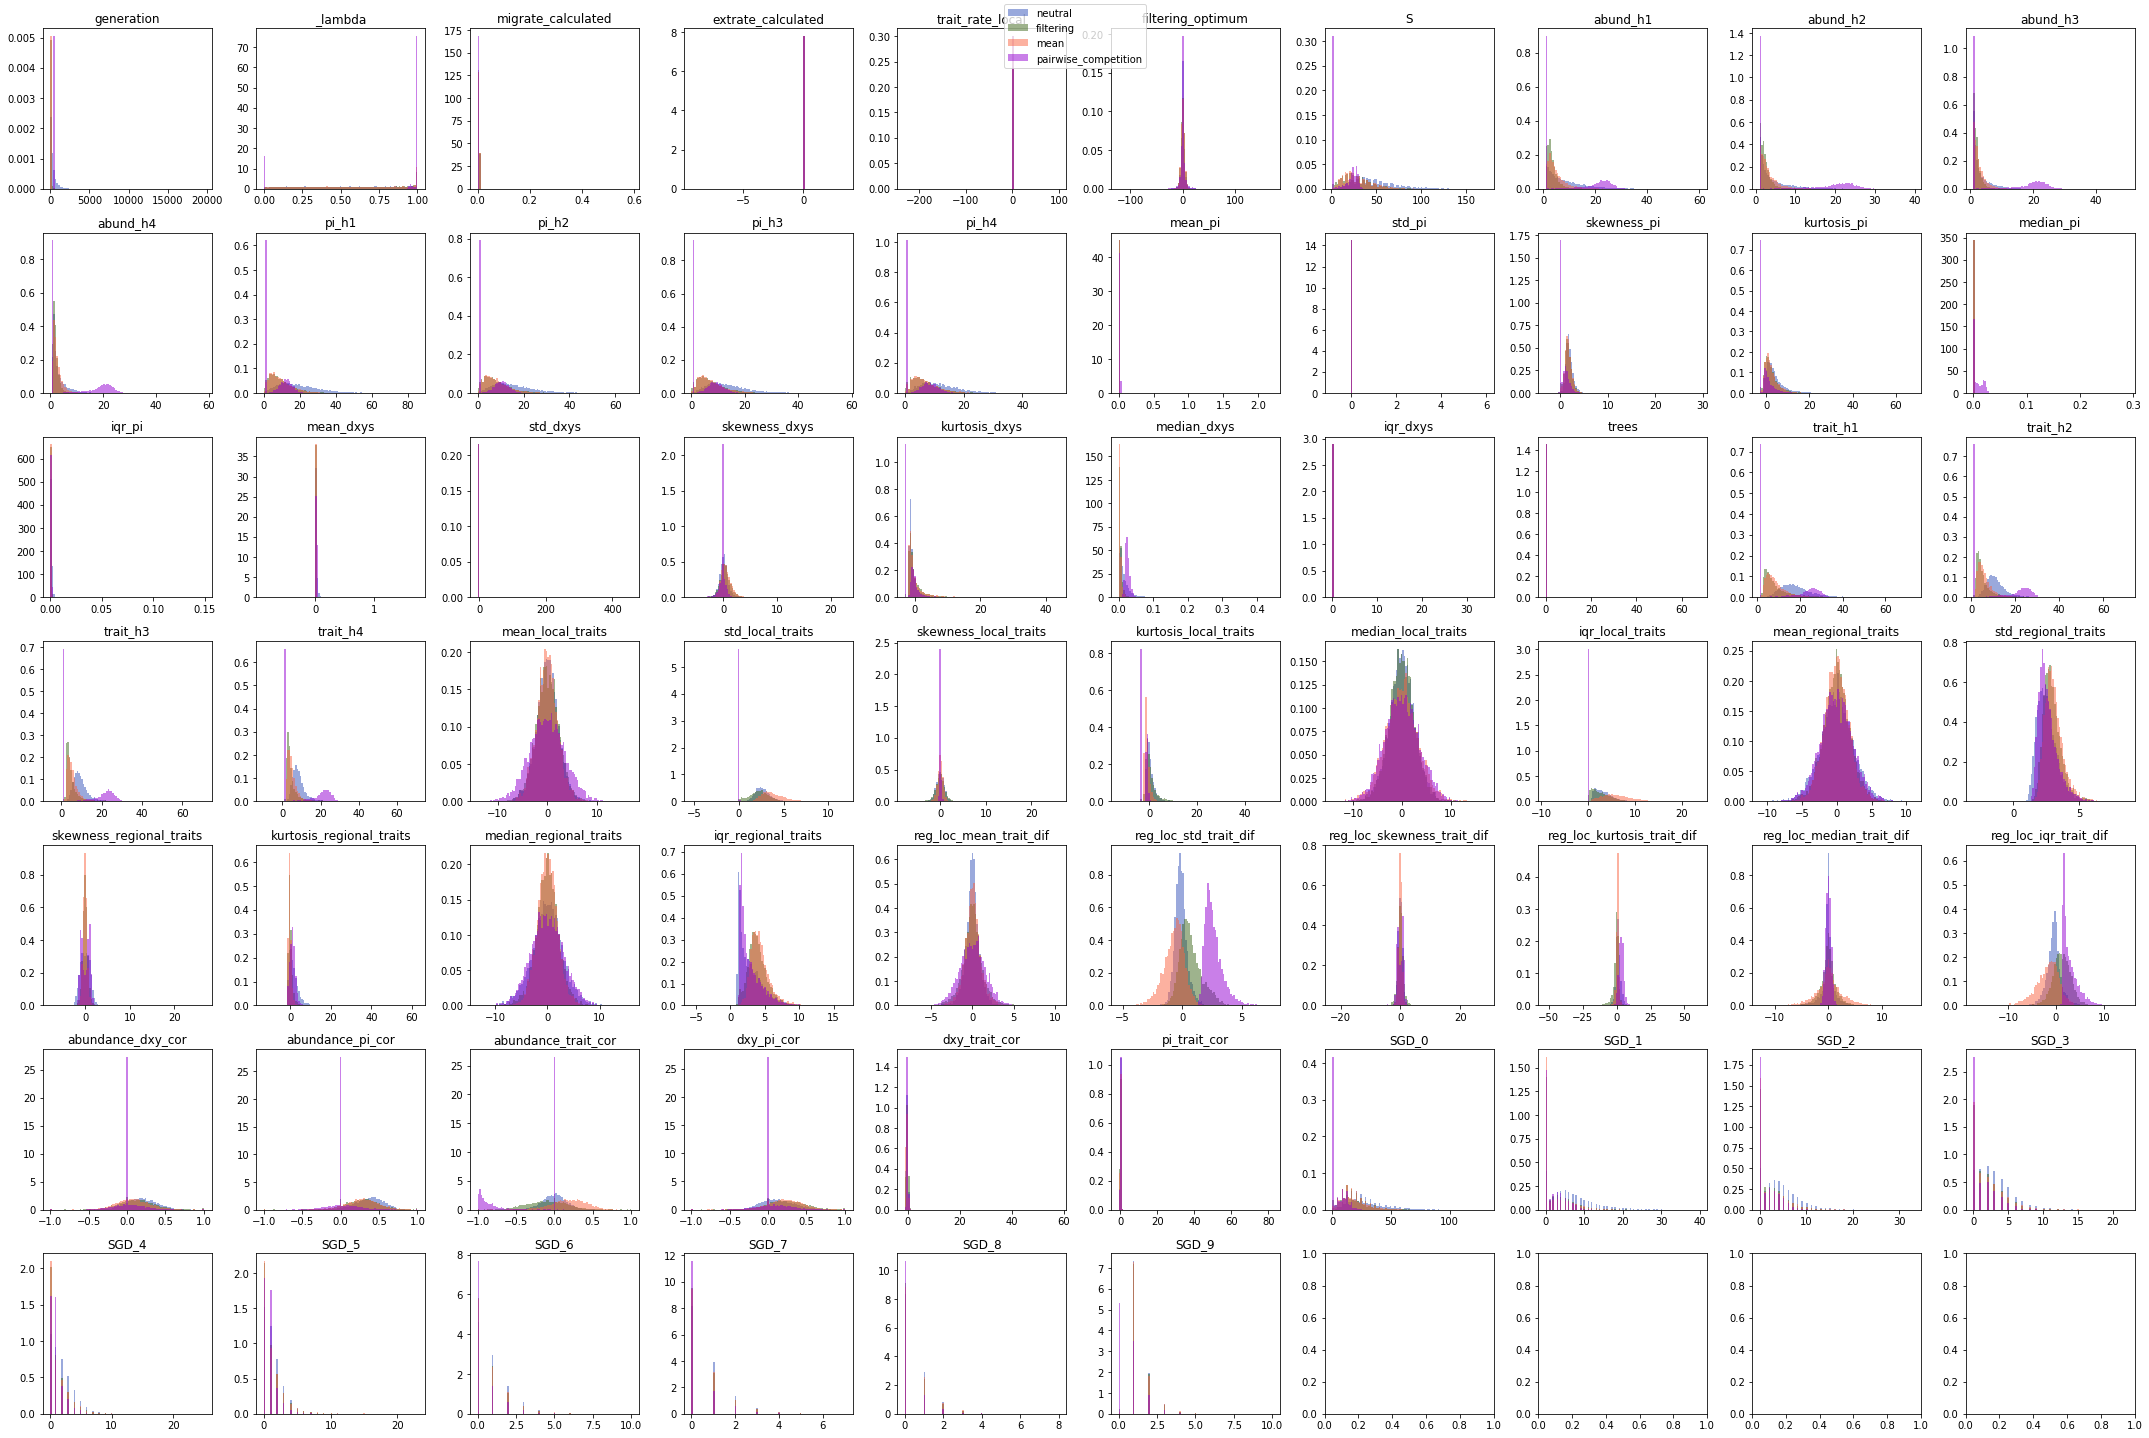

In [32]:
#light yellow is no mutualism
#dark yellow is with mutualism
#red is mean competition
#blue is neutral
#green is filtering

fig, ax = plt.subplots(7, 10, figsize=(30, 20))
axs = fig.axes
for p, ax in zip(list(neutral.columns)[20:], axs):
    b=np.linspace(np.min(global_res[p]),np.max(global_res[p]),100)
    ax.hist(neutral[p], color='#3755BB', density=True, bins=b, alpha=0.5, label="neutral")
    ax.hist(filtering[p], color='#3F681C', density=True, bins=b, alpha=0.5, label="filtering")
    ax.hist(mean[p], color='#FB6542', density=True, bins=b, alpha=0.5, label="mean")
    ax.hist(pairwise_competition[p], color='#9400D3', density=True, bins=b, alpha=0.5, label="pairwise_competition")
    #ax.hist(pw_mut[p], color='#774400', density=True, bins=b, alpha=0.5)
    ax.set_title(p)
    handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
fig.tight_layout()
plt.show
plt.savefig('./global_analysis_100bins.png')

/home/juliette/.local/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/juliette/.local/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


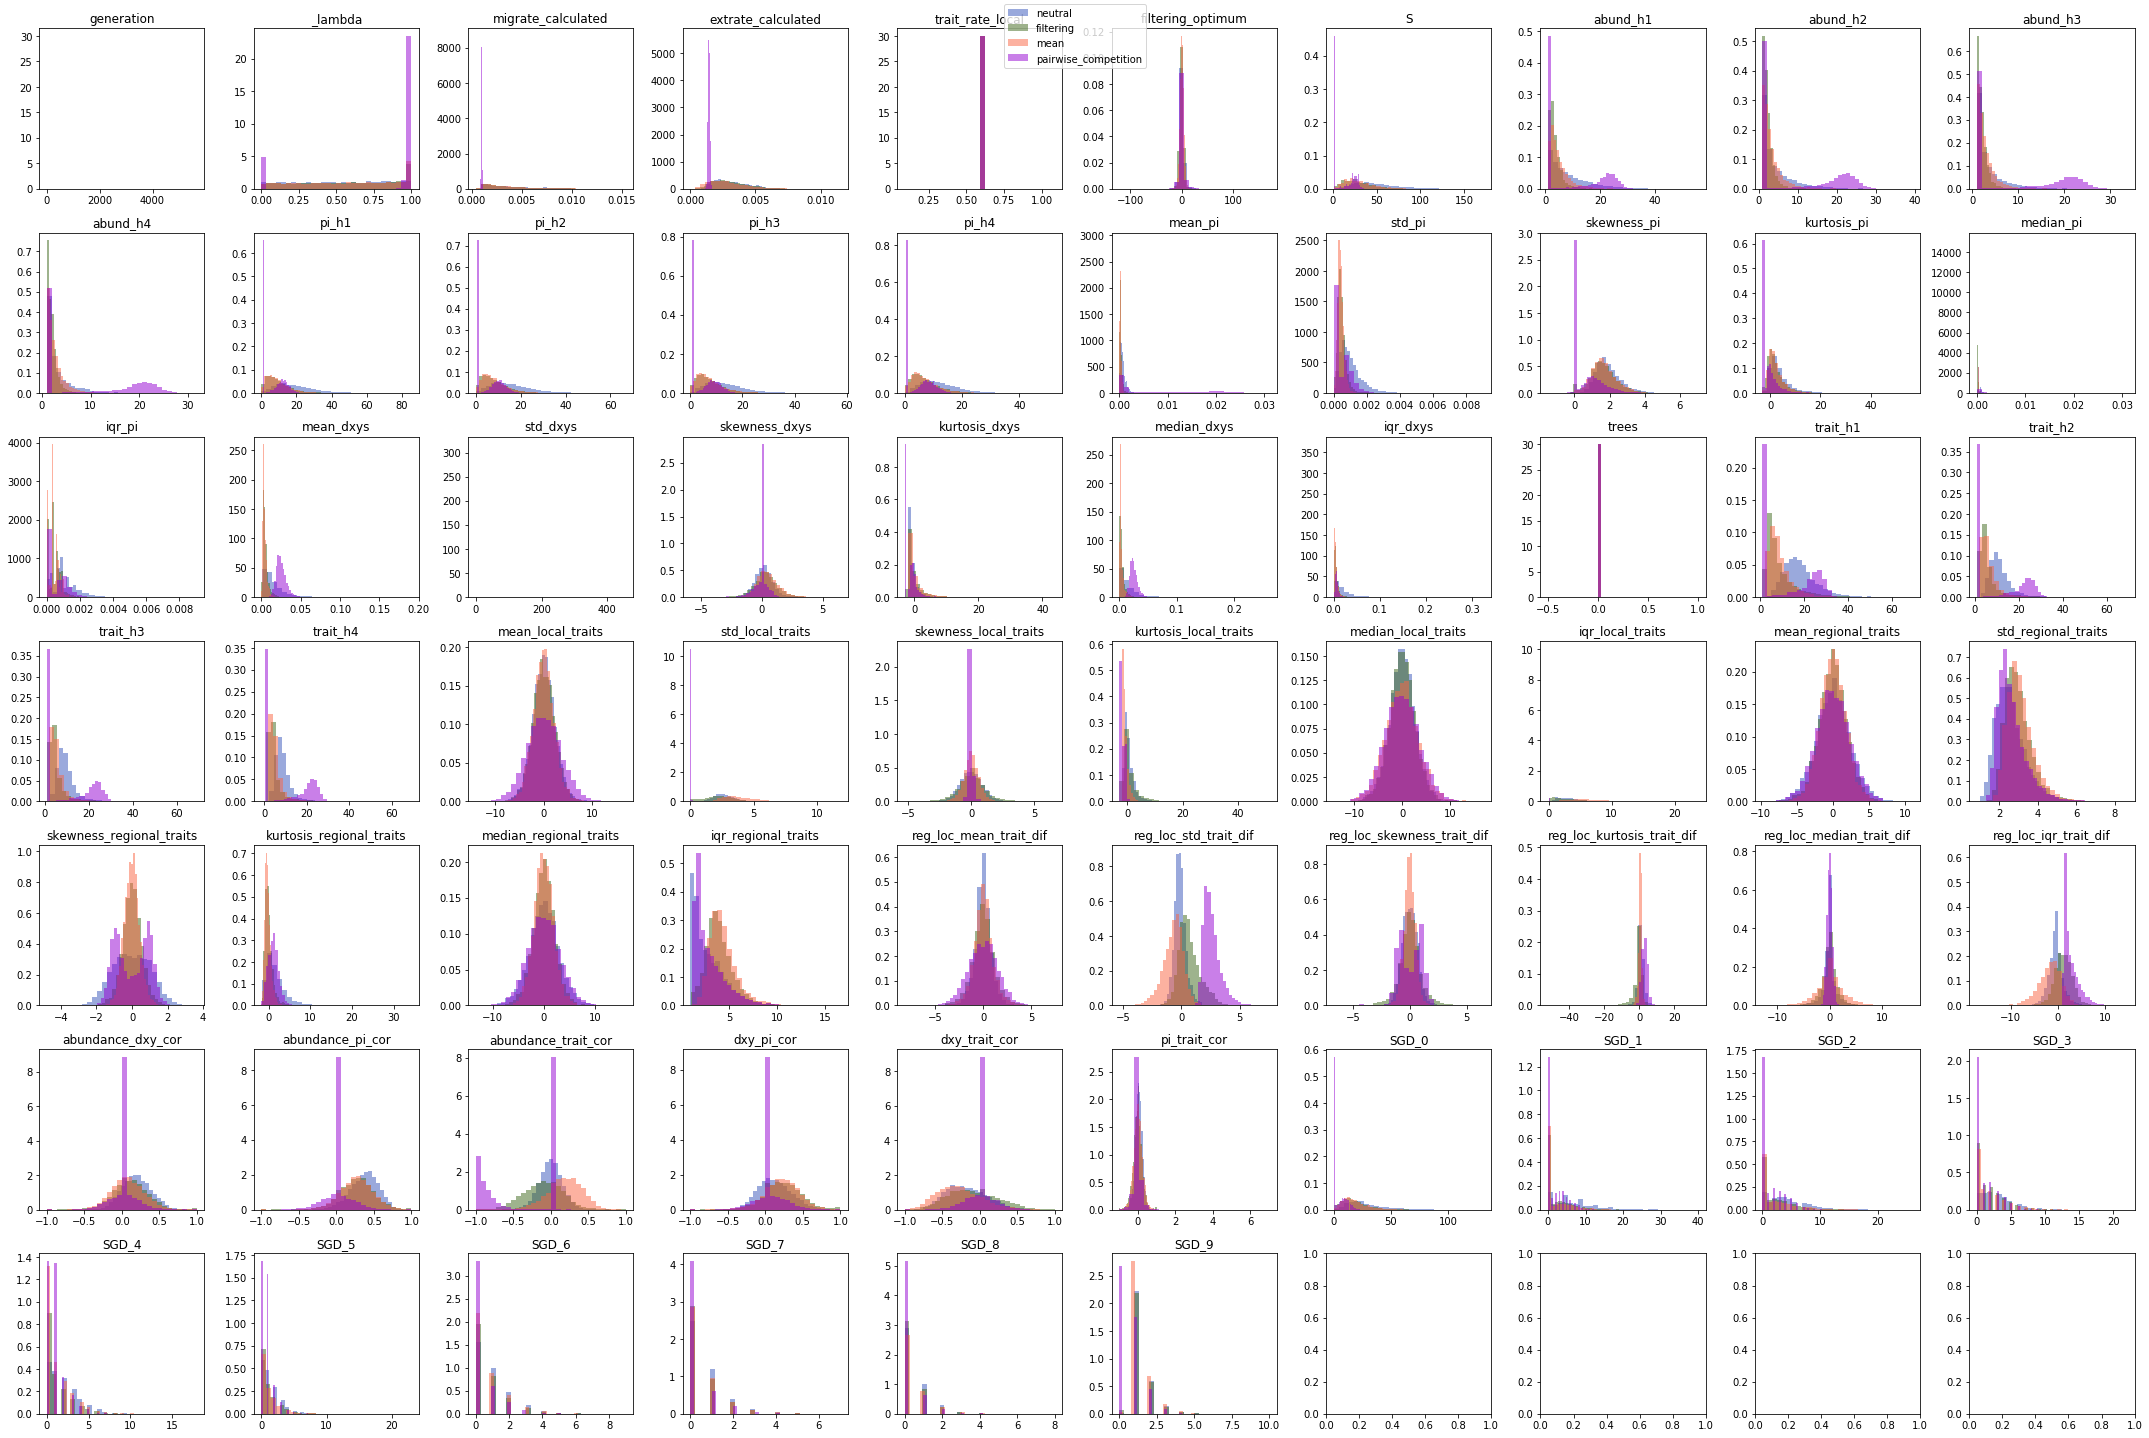

In [33]:
fig, ax = plt.subplots(7, 10, figsize=(30, 20))
axs = fig.axes
for p, ax in zip(list(neutral.columns)[20:], axs):
    ax.hist(neutral[p], color='#3755BB', density=True, bins=30, alpha=0.5, label="neutral")
    ax.hist(filtering[p], color='#3F681C', density=True, bins=30, alpha=0.5, label="filtering")
    ax.hist(mean[p], color='#FB6542', density=True, bins=30, alpha=0.5, label="mean")
    ax.hist(pairwise_competition[p], color='#9400D3', density=True, bins=30, alpha=0.5, label="pairwise_competition")
    #ax.hist(pw_mut[p], color='#774400', density=True, bins=b, alpha=0.5)
    ax.set_title(p)
    handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
fig.tight_layout()
plt.show
plt.savefig('./global_analysis_nobins.png')

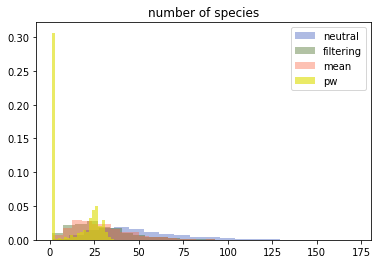

In [41]:
#light yellow is no mutualism
#dark yellow is with mutualism
#red is mean competition
#blue is neutral
#green is filtering


plt.hist(neutral["S"], color='#3755BB', density=True, bins=20, alpha=0.4, label="neutral")
plt.hist(filtering["S"], color='#3F681C', density=True, bins=20, alpha=0.4, label="filtering")
plt.hist(mean["S"], color='#FB6542', density=True, bins=20, alpha=0.4, label="mean")
plt.hist(pairwise_competition["S"], color='#DDDD00', density=True, bins=20, alpha=0.6, label="pw")
plt.title("number of species")
plt.legend()
plt.savefig('./number_species_global_comparison.png')

In [17]:
pairwise_competition=global_res[global_res["community_assembly_model"]=="pairwise_competition"]
print(pairwise_competition.shape)
pairwise_competition=pairwise_competition[pairwise_competition["generations"]=="500.0"]
print(pairwise_competition.shape)

(11536, 86)
(5127, 86)


In [18]:
pw_nomut=pairwise_competition[pairwise_competition["mutualism_proportion"]=="0.0"]
pw_mut=pairwise_competition[pairwise_competition["mutualism_proportion"]!="0.0"]
pw_mut=pw_mut[pw_mut["mutualism_proportion"]!="1.0"]
pw_allmut=pairwise_competition[pairwise_competition["mutualism_proportion"]=="1.0"]
print(len(pw_nomut), len(pw_mut), len(pw_allmut))
pw_nomut=pw_nomut[pw_nomut["generations"]=="500.0"]
pw_mut=pw_mut[pw_mut["generations"]=="500.0"]
pw_allmut=pw_allmut[pw_allmut["generations"]=="500.0"]
print(len(pw_nomut), len(pw_mut), len(pw_allmut))

2418 1898 811
2418 1898 811


In [21]:
pw_low = pw_mut[pd.to_numeric(pw_mut["mutualism_proportion"])<0.1]
pw_high = pw_mut[pd.to_numeric(pw_mut["mutualism_proportion"])>0.9]
pw_close = pd.concat([pw_low,pw_high])

pw_tot = pd.concat([pw_nomut, pw_allmut])

pw_mid = pw_mut[pd.to_numeric(pw_mut["mutualism_proportion"])>0.1]
pw_mid = pw_mid[pd.to_numeric(pw_mid["mutualism_proportion"])<0.9]

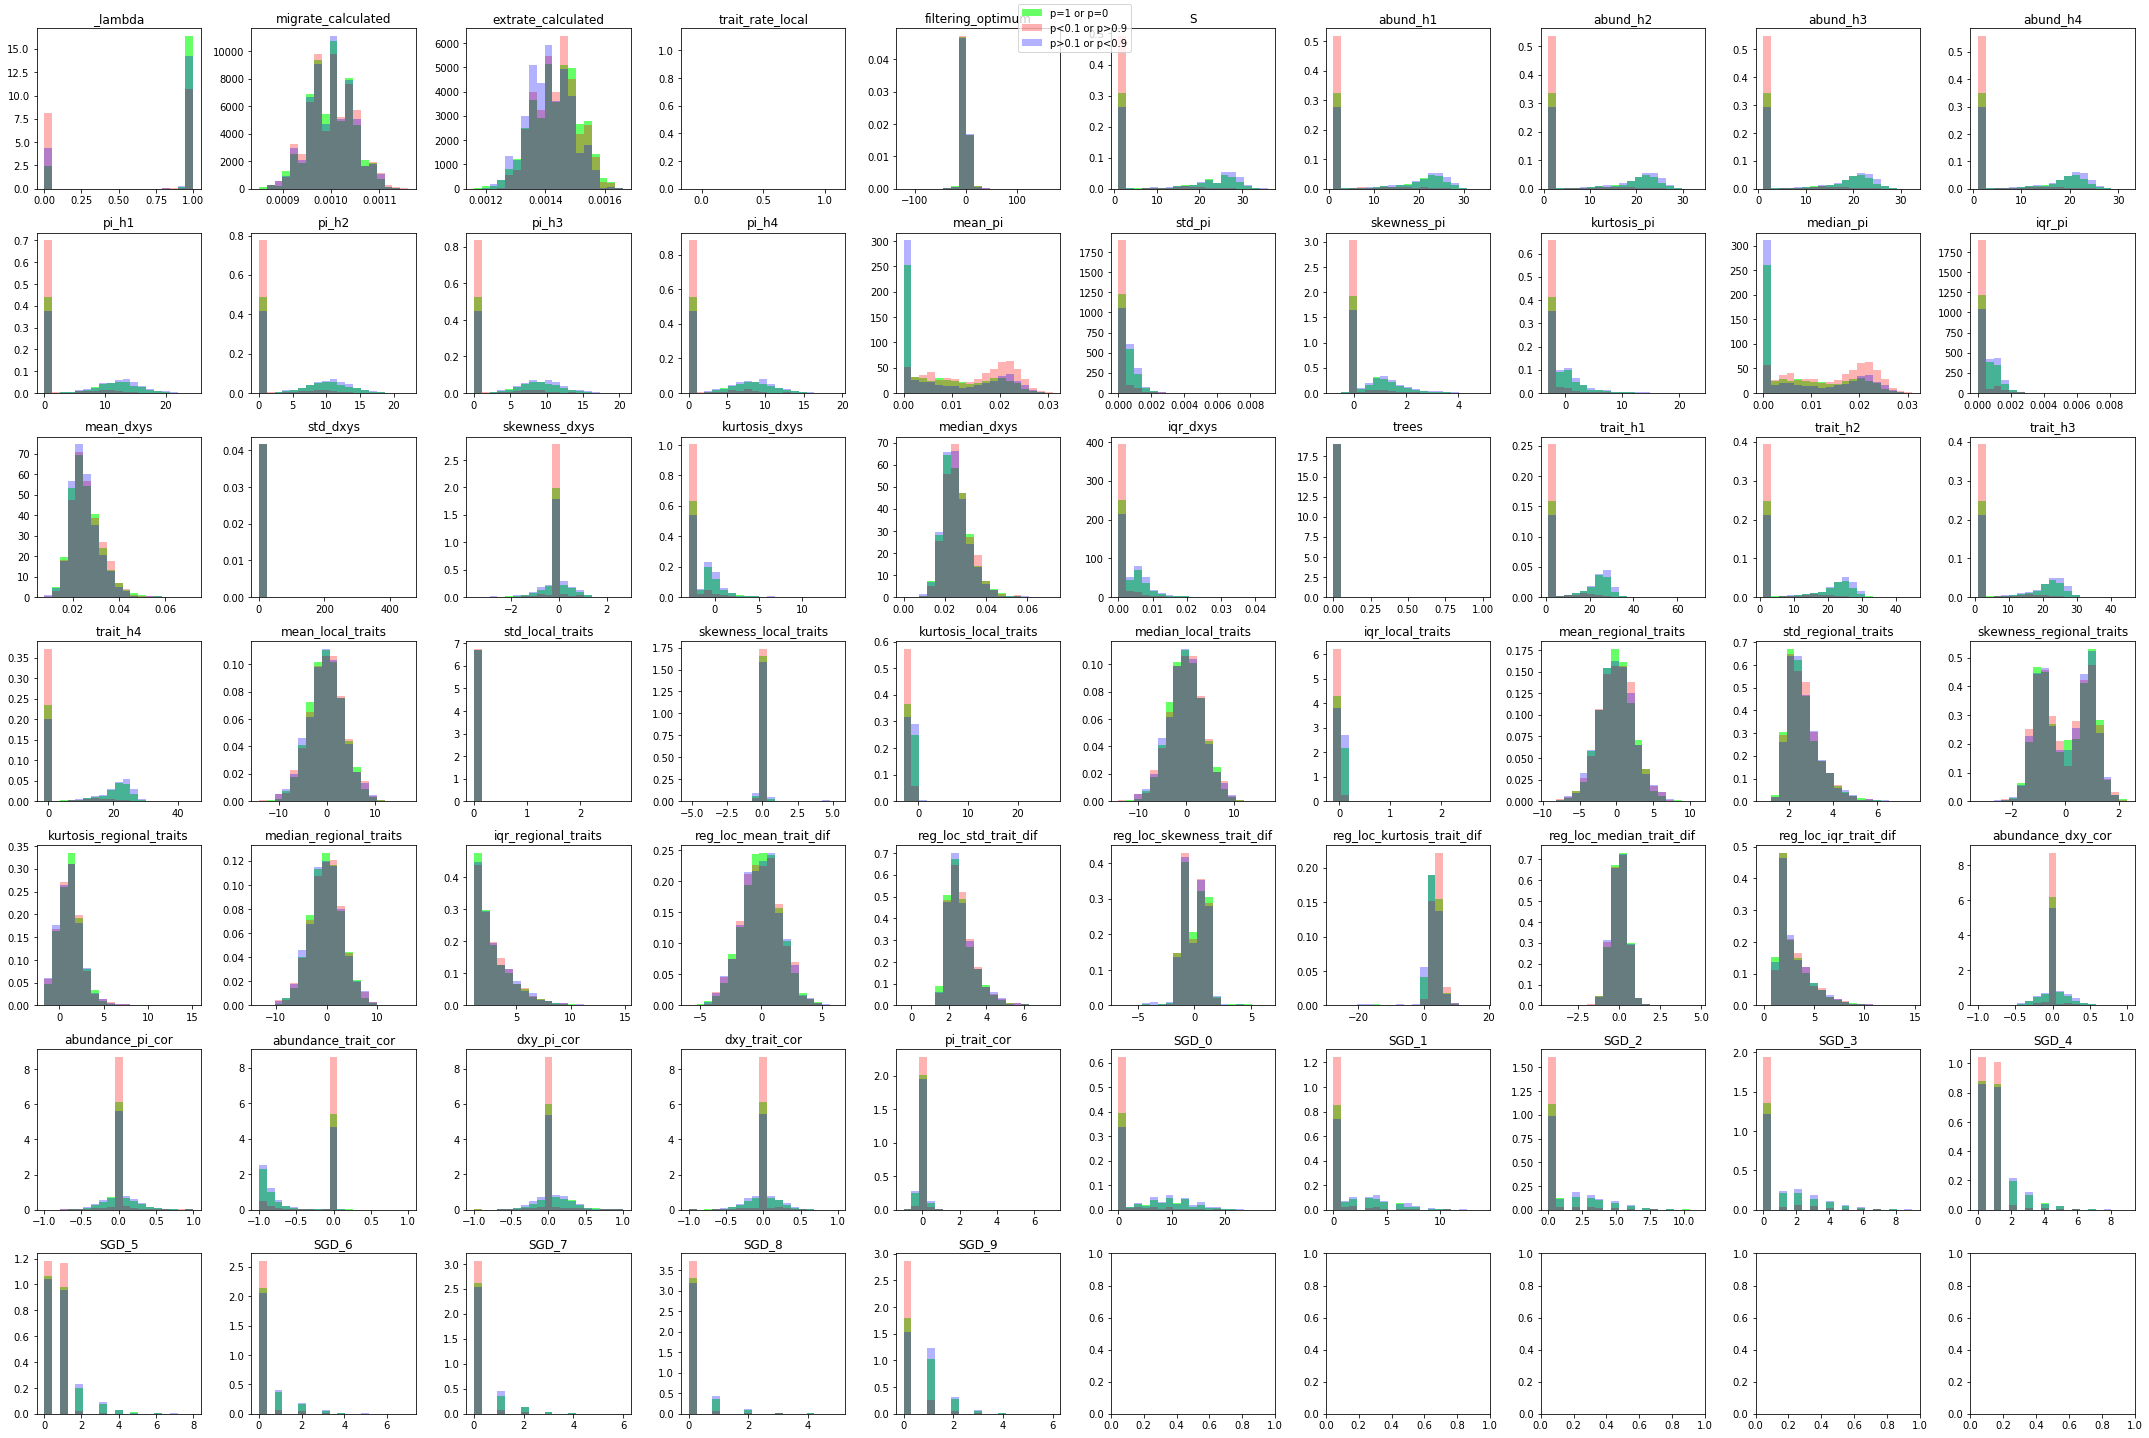

In [40]:
#light yellow is no mutualism
#green is with mutualism
########green is all pairwise
#purple is mutualism=1
fig, ax = plt.subplots(7, 10, figsize=(30, 20))
axs = fig.axes

for p, ax in zip(list(pairwise_competition.columns)[21:], axs):
    b=np.linspace(np.min(pairwise_competition[p]),np.max(pairwise_competition[p]),20)
    ax.hist(pw_tot[p], color='#00FF00', density=True, bins=b, alpha=0.6, label='p=1 or p=0')
    ax.hist(pw_close[p], color='#FF0000', density=True, bins=b, alpha=0.3, label='p<0.1 or p>0.9')
    ax.hist(pw_mid[p], color='#0000FF', density=True, bins=b, alpha=0.3, label='p>0.1 or p<0.9')
    ax.set_title(p)
    handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
fig.tight_layout()
plt.show
plt.savefig('./pairwise_analysis.png')

It is shown here that there is a discontinuity with the mutualism proportion : can not be estimated thourgh classical regression ?

In [23]:
# Test discontinuity for interaction terms (all same VS existing variations)
# Test afterward with difference intraspecific/interspecific ? (all same VS divergence between both ?)

pw_const=pairwise_competition[pd.to_numeric(pairwise_competition["intrasp_competition_b"]) == -1.0]
print(pw_const.shape)
pw_var=pairwise_competition[pd.to_numeric(pairwise_competition["intrasp_competition_b"]) != -1.0]
print(pw_var.shape)
pw_allmostcont=pw_var[pd.to_numeric(pw_var["intersp_competition_a"])*pd.to_numeric(pw_var["intersp_competition_b"])**2<0.09]
pw_allmostcont=pw_allmostcont[pd.to_numeric(pw_allmostcont["intrasp_competition_a"])*pd.to_numeric(pw_allmostcont["intrasp_competition_b"])**2<0.09]

print(pw_allmostcont.shape)


(5127, 86)
(0, 86)
(0, 86)


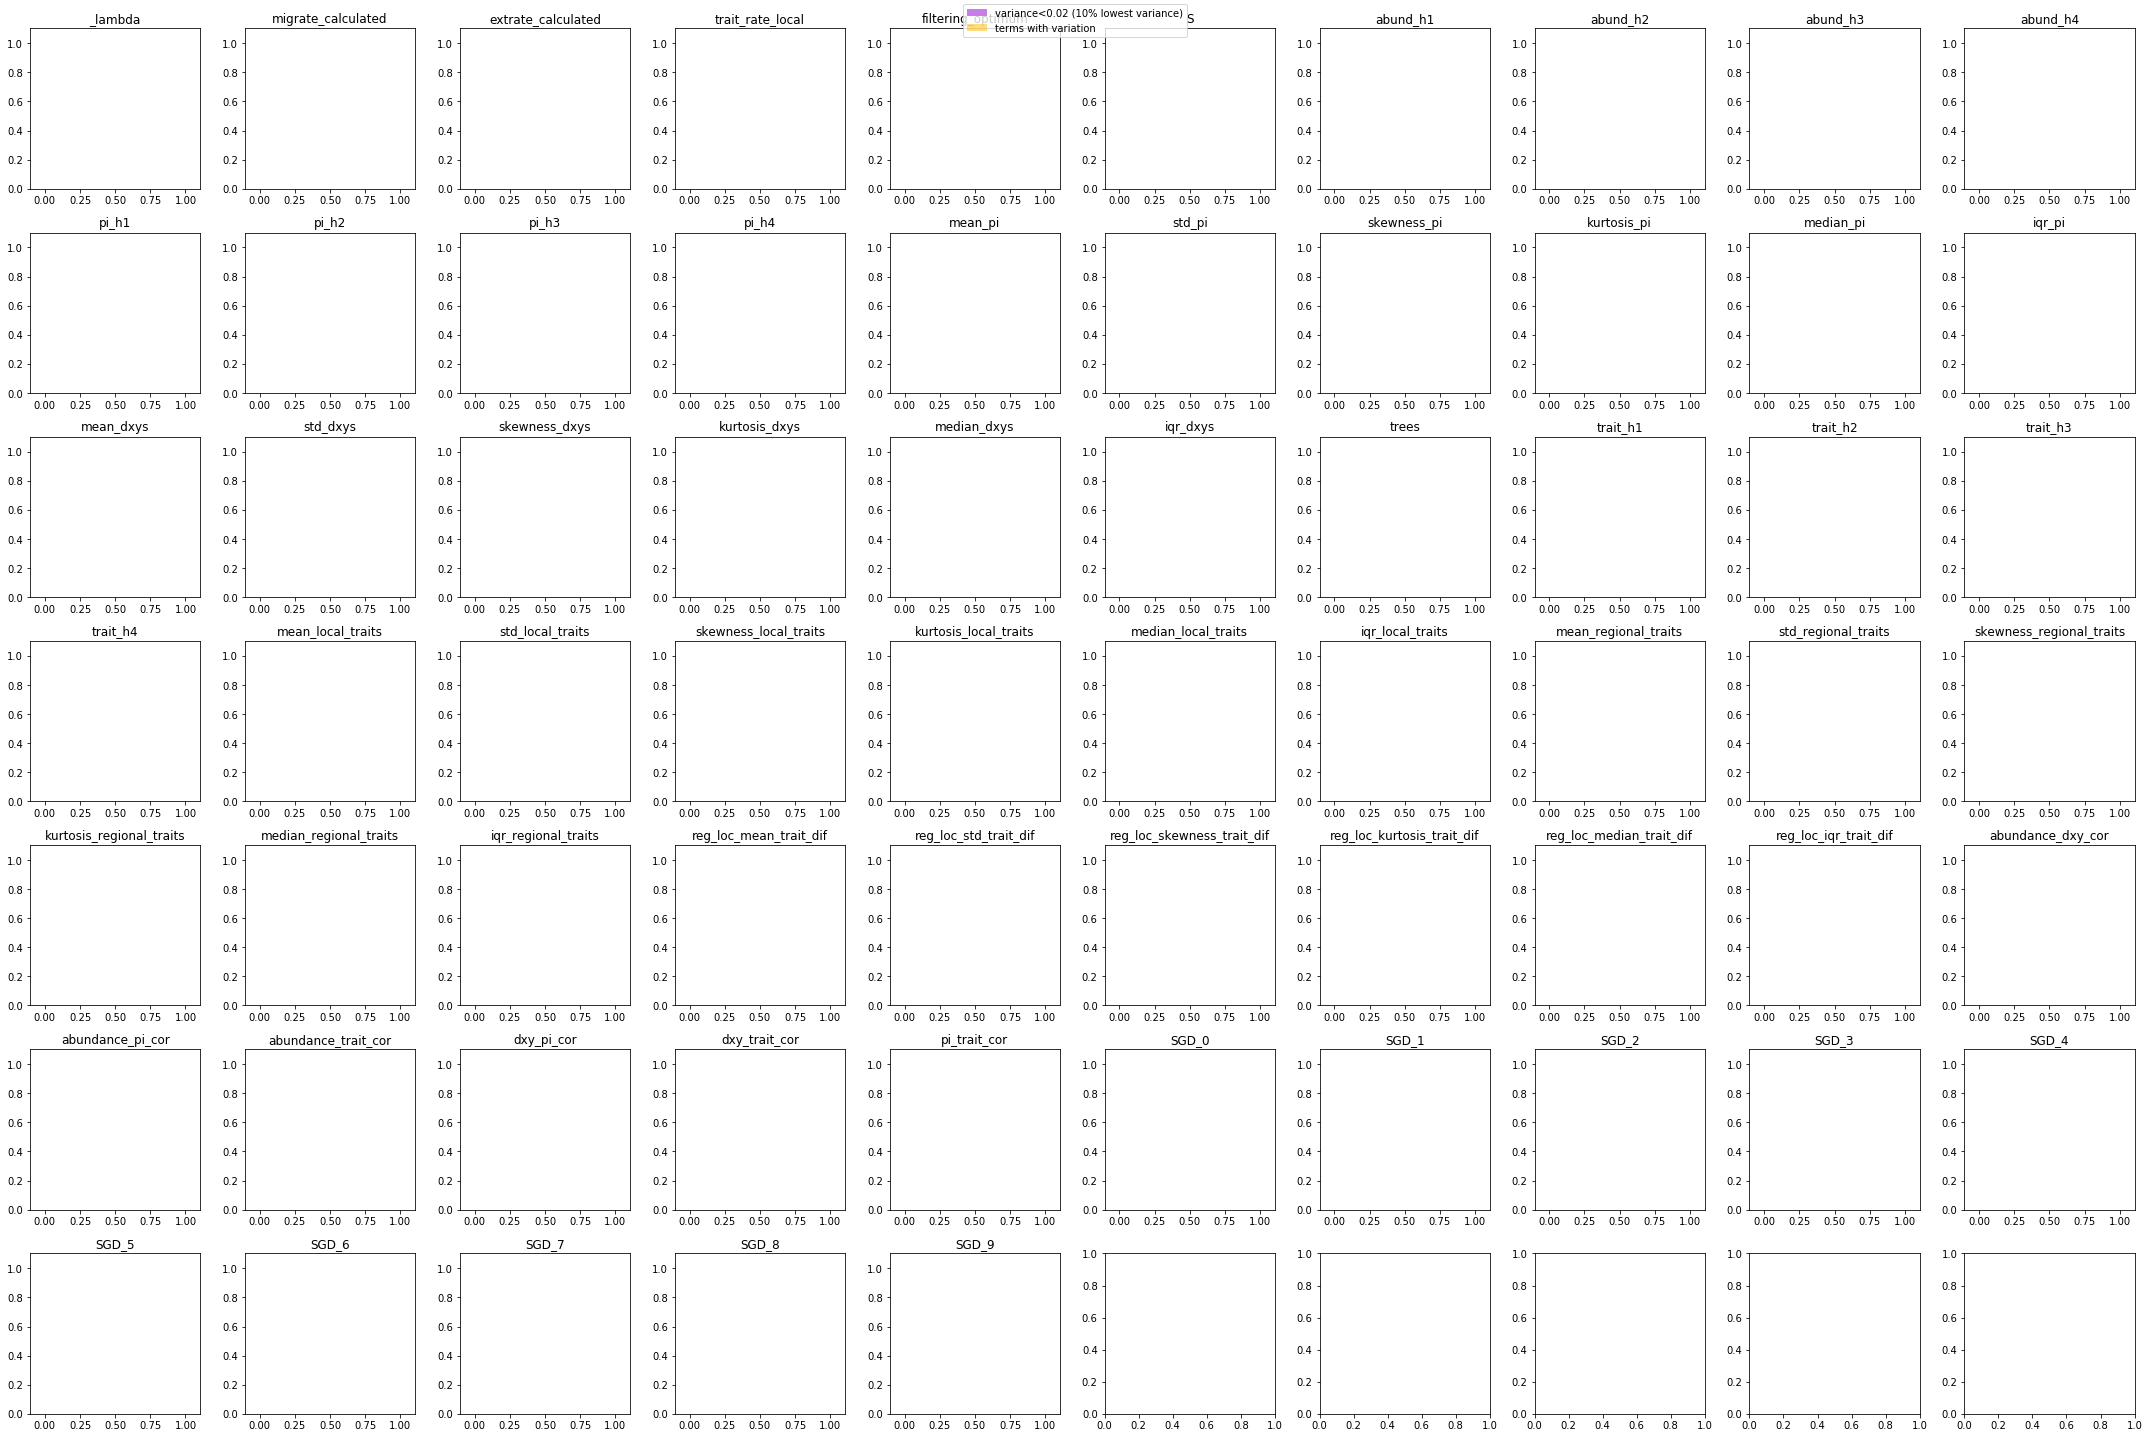

In [24]:
fig, ax = plt.subplots(7, 10, figsize=(30, 20))
axs = fig.axes

for p, ax in zip(list(pairwise_competition.columns)[21:], axs):
    b=np.linspace(np.min(pairwise_competition[p]),np.max(pairwise_competition[p]),20)
    ax.hist(pw_allmostcont[p], color='#9400D3', density=True, bins=b, alpha=0.5, label='variance<0.02 (10% lowest variance)')
    ax.hist(pw_var[p], color='#FFBB00', density=True, bins=b, alpha=0.5, label='terms with variation')
    ax.set_title(p)
    handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
fig.tight_layout()
plt.show
plt.savefig('./matrix_analysis.png')

In [62]:
pw_500=pairwise_competition[pairwise_competition["generations"]=="500.0"]
pw_id=pw_500[pw_500["intersp_competition_a"]==pw_500["intrasp_competition_a"]]
print(pw_500.shape, pw_id.shape)
pw_close=pw_500[pd.to_numeric(pw_500["intersp_competition_a"])-pd.to_numeric(pw_500["intrasp_competition_a"])<0.01]
pw_close=pw_close[pw_close["intersp_competition_a"]!=pw_close["intrasp_competition_a"]]
pw_far=pw_500[pd.to_numeric(pw_500["intersp_competition_a"])-pd.to_numeric(pw_500["intrasp_competition_a"])>0.01]
print(pw_close.shape, pw_far.shape)

pw_inter=pw_far[pd.to_numeric(pw_far["intersp_competition_a"])>pd.to_numeric(pw_far["intrasp_competition_a"])]
pw_intra=pw_far[pd.to_numeric(pw_far["intersp_competition_a"])<pd.to_numeric(pw_far["intrasp_competition_a"])]
print(pw_inter.shape, pw_intra.shape)
print(np.array(pw_far["intersp_competition_a"])[0])
for i in range(len(pw_far)):
    print(np.array(pw_far["intersp_competition_a"])[i],np.array(pw_far["intrasp_competition_a"])[i])

(5127, 86) (356, 86)
(2612, 86) (2159, 86)
(2159, 86) (0, 86)
0.67373
0.67373 0.00168
4.4200099999999996 4.24915
2.3877900000000003 0.00112
1.58724 1.12151
4.36845 2.90962
4.33131 1.3244799999999999
6.63674 0.8974799999999999
0.18847 0.00213
3.54359 0.0192
1.31715 0.013590000000000001
0.06377000000000001 0.00971
0.07917 0.00252
0.29003 0.00496
0.08453 0.029419999999999998
0.46786000000000005 0.0031899999999999997
0.26153000000000004 0.11305
8.80211 0.02047
1.54244 0.9828100000000001
1.2153399999999999 0.0017
5.27875 0.00885
0.14667 0.04718
1.39877 0.33685
1.26521 0.06414
0.04591 0.00713
2.7912 0.00135
0.43699 0.006690000000000001
0.9489200000000001 0.4803
0.48455 0.17242000000000002
0.29041999999999996 0.00476
4.94625 0.00454
0.1181 0.0379
0.95676 0.00524
4.7244 0.00115
0.027839999999999997 0.00988
0.01435 0.00301
0.1082 0.09237999999999999
0.0275 0.017480000000000002
0.35923 0.02014
1.4204299999999999 0.00513
0.05851 0.04541
0.11039000000000002 0.00761
1.88316 1.84807
7.64838999999999

2.46723 0.00103
0.9439 0.033889999999999997
1.18034 0.8087300000000001
4.92127 0.00201
4.58142 0.0201
0.10574000000000001 0.0893
0.28626 0.00282
8.55907 1.2661
8.89128 2.31486
0.18500999999999998 0.00598
2.49275 0.0116
1.44508 0.0166
5.9766699999999995 0.01466
0.07948999999999999 0.001
2.32134 0.00292
1.0129299999999999 0.04552
0.40071 0.00352
0.74648 0.08157
1.0021 0.01842
0.06849 0.01192
0.051160000000000004 0.00119
3.0811599999999997 0.00229
3.5489300000000004 2.2671099999999997
8.17175 2.4226799999999997
1.59371 1.24925
4.06572 0.28734
1.9472099999999999 0.09097999999999999
9.3639 0.33526
6.09048 0.01846
0.37496 0.21681999999999998
0.032119999999999996 0.002
1.54288 0.01238
0.03477 0.010920000000000001
0.78769 0.00489
0.06825 0.027589999999999996
0.04556 0.0064
5.59745 0.0253
2.0443599999999997 0.008879999999999999
0.66977 0.15982000000000002
0.19643 0.00617
6.44782 0.13862
1.59123 0.71325
2.79216 0.09217
0.57806 0.00249
5.78304 0.48423
5.6647 0.76939
1.3356299999999999 0.00505
9.0

0.79897 0.3945
0.27346 0.16744
0.8553799999999999 0.31840999999999997
0.95886 0.33434
0.22668000000000002 0.20425
0.30833 0.20756999999999998
0.22919 0.13151
0.8496100000000001 0.29785
0.76788 0.11268
0.74416 0.16076
0.44919 0.37271
0.16835 0.11058
0.29562 0.13912
0.9266399999999999 0.25451
0.79991 0.11045999999999999
0.983 0.25999
0.46546000000000004 0.10874
0.568 0.41544
0.63142 0.22338000000000002
0.51081 0.19993
0.56593 0.28645
0.46048 0.36682
0.39733 0.37825
0.5853 0.18111
0.5219199999999999 0.26441
0.13677 0.12504
0.21302 0.10400000000000001
0.34215999999999996 0.23538
0.3003 0.17518
0.61916 0.16518
0.45621000000000006 0.14107
0.79937 0.5230100000000001
0.7581100000000001 0.66808
0.39411 0.23251
0.72227 0.64986
0.22152 0.19247999999999998
0.45135 0.1668
0.42073 0.16347
0.33726 0.1314
0.35556 0.12679
0.87628 0.2359
0.15379 0.12499
0.12523 0.10067000000000001
0.32137 0.22685999999999998
0.17089000000000001 0.14198
0.55985 0.447
0.65089 0.26454
0.22358000000000003 0.2103
0.36944 0.1

/home/juliette/.local/lib/python3.8/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: divide by zero encountered in true_divide
  return n/db/n.sum(), bin_edges


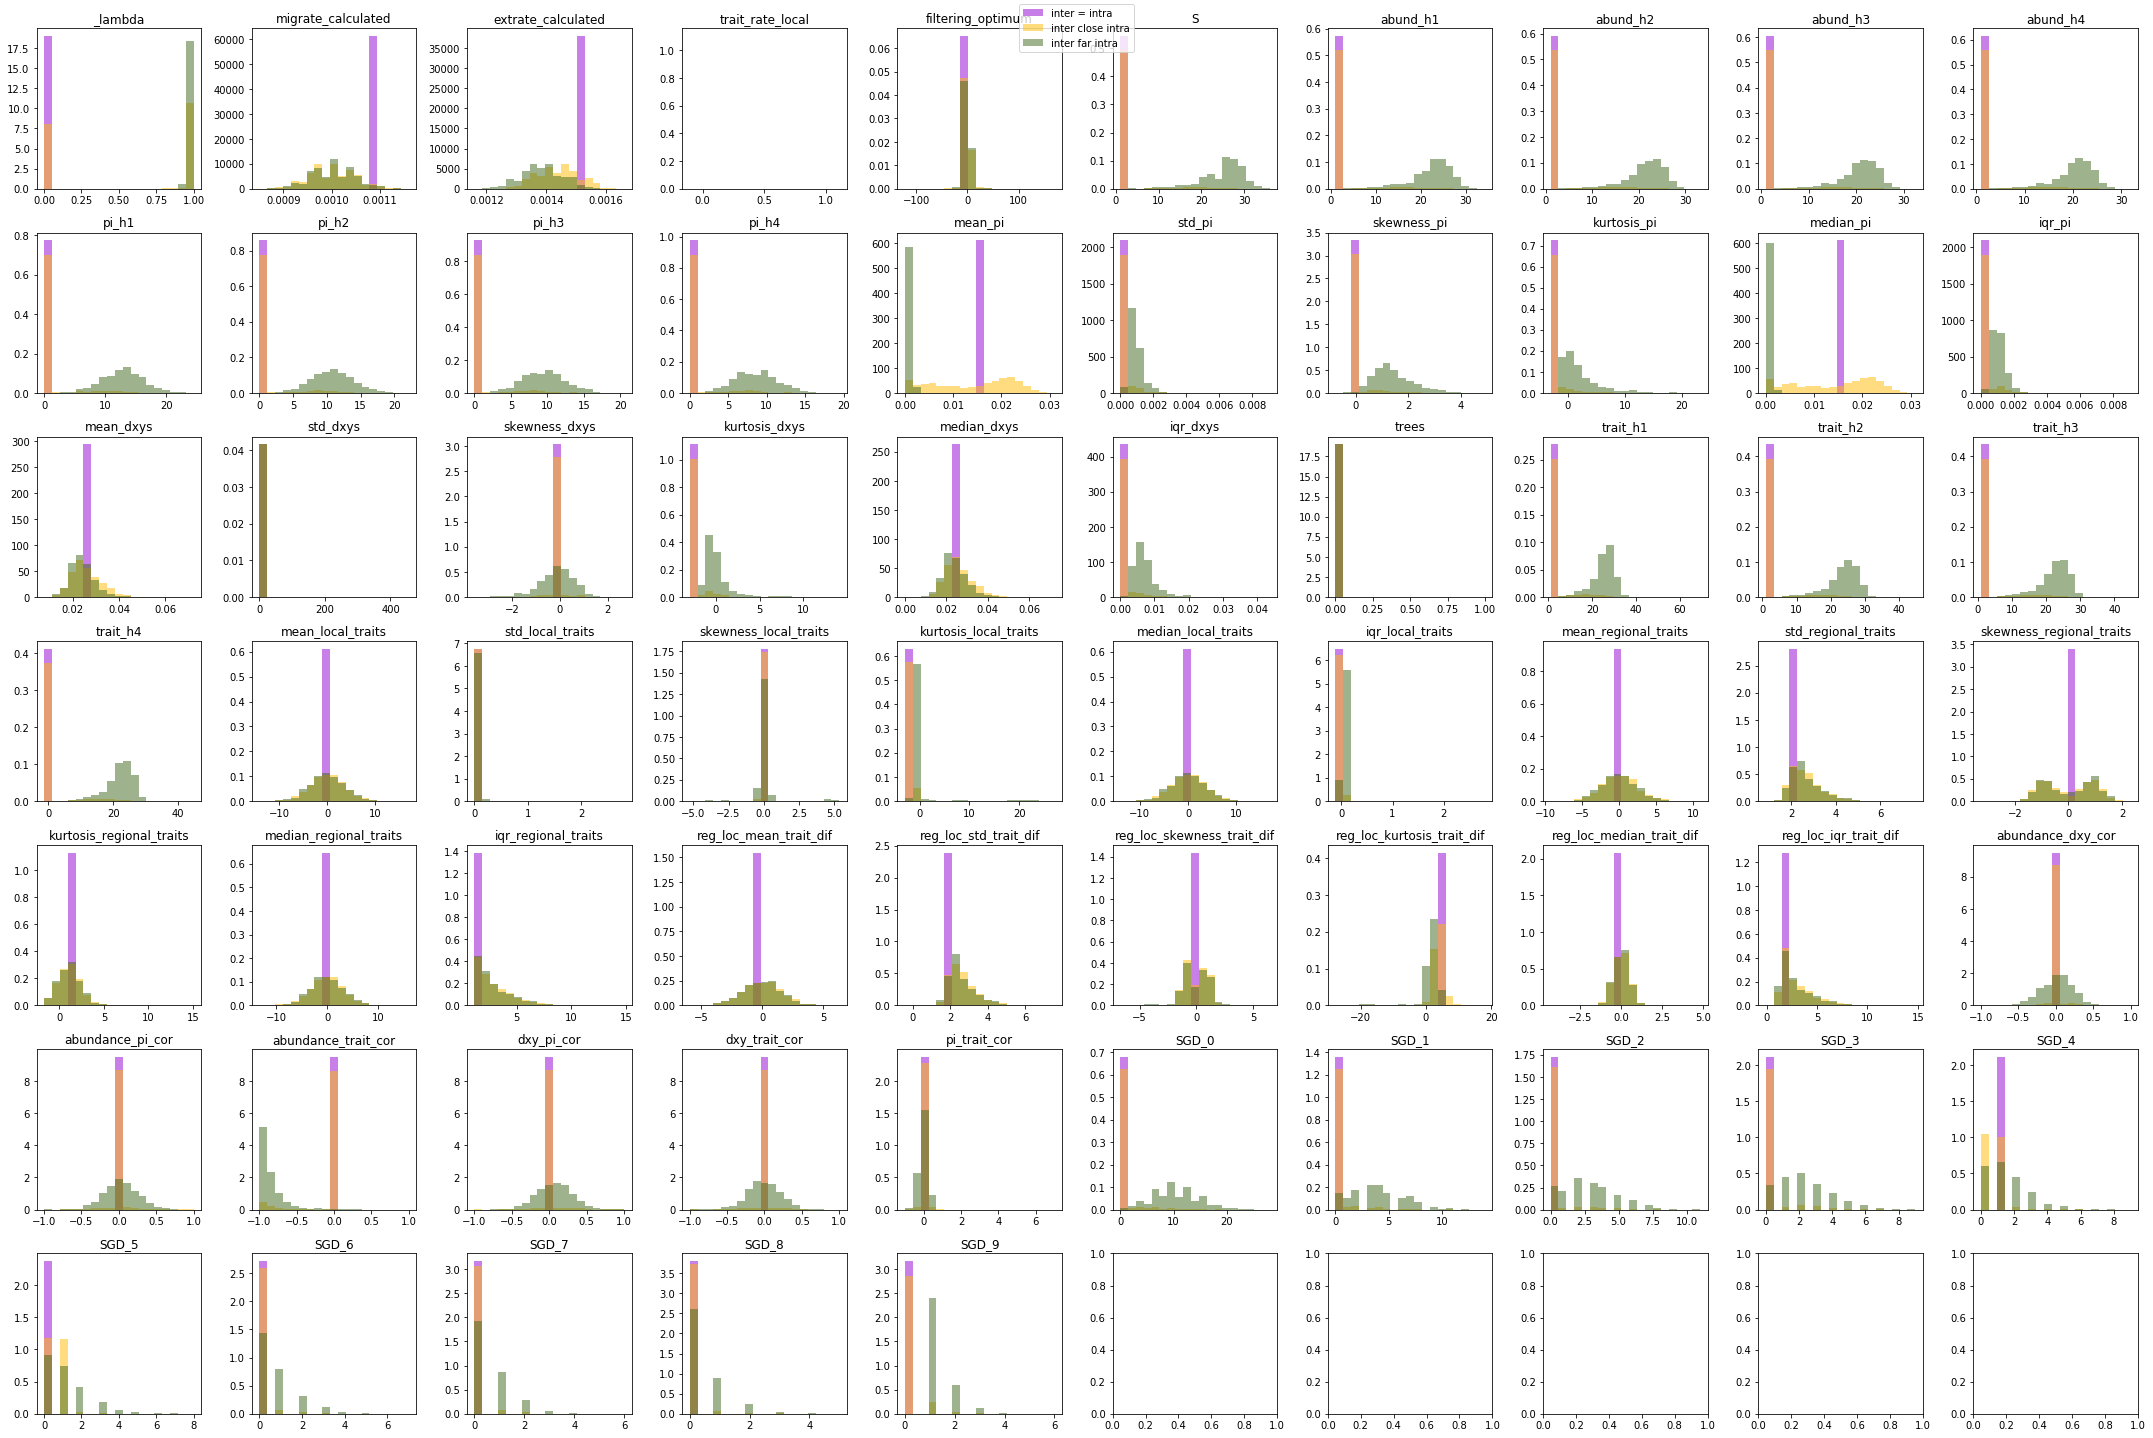

In [79]:
fig, ax = plt.subplots(7, 10, figsize=(30, 20))
axs = fig.axes

for p, ax in zip(list(pairwise_competition.columns)[21:], axs):
    b=np.linspace(np.min(pairwise_competition[p]),np.max(pw_500[p]),20)
    ax.hist(pw_id[p], color='#9400D3', density=True, bins=b, alpha=0.5, label='inter = intra')
    ax.hist(pw_close[p], color='#FFBB00', density=True, bins=b, alpha=0.5, label='inter close intra')
    ax.hist(pw_far[p], color='#3F681C', density=True, bins=b, alpha=0.5, label='inter far intra')
    ax.set_title(p)
    handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
fig.tight_layout()
plt.show
plt.savefig('./matrix_analysis_identical_comp_terms.png')

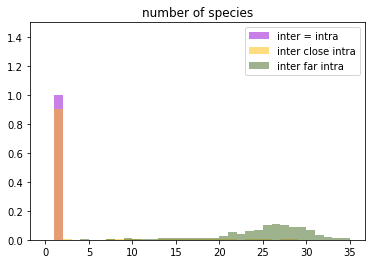

In [78]:
pw_id=pw_id[pw_id["mutualism_proportion"]!="0.0"]
pw_id=pw_id[pw_id["mutualism_proportion"]!="1.0"]
pw_close=pw_close[pw_close["mutualism_proportion"]!="0.0"]
pw_close=pw_close[pw_close["mutualism_proportion"]!="1.0"]
pw_far=pw_far[pw_far["mutualism_proportion"]!="0.0"]
pw_far=pw_far[pw_far["mutualism_proportion"]!="1.0"]

b = np.arange(0,np.max(pw_500["S"]))
plt.hist(pw_id["S"], color='#9400D3', density=True, bins=b, alpha=0.5, label='inter = intra')
plt.hist(pw_close["S"], color='#FFBB00', density=True, bins=b, alpha=0.5, label='inter close intra')
plt.hist(pw_far["S"], color='#3F681C', density=True, bins=b, alpha=0.5, label='inter far intra')
plt.title("number of species")
plt.legend()
plt.ylim(0,1.5)
plt.savefig('./number_species_comparison_term.png')

(2418, 86)
(811, 86)


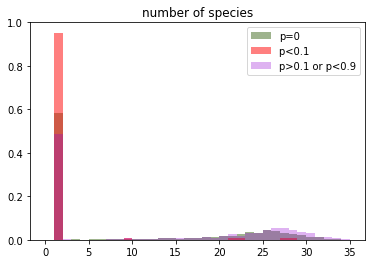

In [77]:
b = np.arange(0,np.max(pw_500["S"]))
pw0=pw_tot[pw_tot["mutualism_proportion"]=="0.0"]
print(pw0.shape)
pw1=pw_tot[pw_tot["mutualism_proportion"]=="1.0"]
print(pw1.shape)
pw_close0=pw_close[pd.to_numeric(pw_close["mutualism_proportion"])<0.1]
pw_close1=pw_close[pd.to_numeric(pw_close["mutualism_proportion"])>0.9]
plt.hist(pw0["S"], color='#3F681C', density=True, bins=b, alpha=0.5, label='p=0')
#plt.hist(pw1["S"], color='#3755BB', density=True, bins=b, alpha=0.5, label='p=1')
plt.hist(pw_close0["S"], color='#FF0000', density=True, bins=b, alpha=0.5, label='p<0.1 ')
#plt.hist(pw_close1["S"], color='#00CC88', density=True, bins=b, alpha=0.5, label='p>0.9')
plt.hist(pw_mid["S"], color='#9400D3', density=True, bins=b, alpha=0.3, label='p>0.1 or p<0.9')
plt.title("number of species")
plt.legend()
plt.ylim(0,1)
plt.savefig('./number_species_comparison_mut0_2.png')

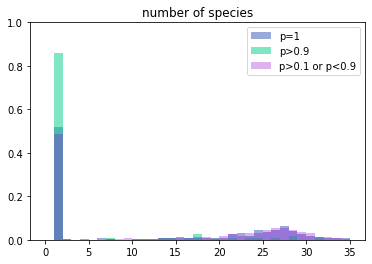

In [75]:
b = np.arange(0,np.max(pw_500["S"]))
pw0=pw_tot[pw_tot["mutualism_proportion"]=="0.0"]
pw1=pw_tot[pw_tot["mutualism_proportion"]=="1.0"]
pw_close0=pw_close[pd.to_numeric(pw_close["mutualism_proportion"])<0.1]
pw_close1=pw_close[pd.to_numeric(pw_close["mutualism_proportion"])>0.9]
#plt.hist(pw0["S"], color='#3F681C', density=True, bins=b, alpha=0.5, label='p=0')
plt.hist(pw1["S"], color='#3755BB', density=True, bins=b, alpha=0.5, label='p=1')
#plt.hist(pw_close0["S"], color='#FF0000', density=True, bins=b, alpha=0.5, label='p<0.1 ')
plt.hist(pw_close1["S"], color='#00CC88', density=True, bins=b, alpha=0.5, label='p>0.9')
plt.hist(pw_mid["S"], color='#9400D3', density=True, bins=b, alpha=0.3, label='p>0.1 or p<0.9')
plt.title("number of species")
plt.legend()
plt.ylim(0,1)
plt.savefig('./number_species_comparison_mut1_2.png')

In [ ]:
fig, ax = plt.subplots(7, 10, figsize=(30, 20))
axs = fig.axes

for p, ax in zip(list(pairwise_competition.columns)[21:], axs):
    b=np.linspace(np.min(pairwise_competition[p]),np.max(pw_500[p]),20)
    pw_close0=pw_close[pd.to_numeric(pw_close["mutualism_proportion"])<0.1]
    pw_close1=pw_close[pd.to_numeric(pw_close["mutualism_proportion"])>0.9]
    ax.hist(pw0[p], color='#3F681C', density=True, bins=b, alpha=0.5, label='p=0')
    ax.hist(pw1[p], color='#3755BB', density=True, bins=b, alpha=0.5, label='p=1')
    ax.hist(pw_close0[p], color='#FF0000', density=True, bins=b, alpha=0.5, label='p<0.1 ')
    ax.hist(pw_close1[p], color='#00CC88', density=True, bins=b, alpha=0.5, label='p>0.9')
    ax.hist(pw_mid[p], color='#9400D3', density=True, bins=b, alpha=0.3, label='p>0.1 or p<0.9')
    ax.set_title(p)
    handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
fig.tight_layout()
plt.show
plt.savefig('./matrix_analysis_identical_mut_prop.png')

In [ ]:
fig, ax = plt.subplots(7, 10, figsize=(30, 20))
axs = fig.axes

for p, ax in zip(list(pairwise_competition.columns)[21:], axs):
    b=np.linspace(np.min(pairwise_competition[p]),np.max(pw_500[p]),20)
    pw_close0=pw_close[pd.to_numeric(pw_close["mutualism_proportion"])<0.1]
    pw_close1=pw_close[pd.to_numeric(pw_close["mutualism_proportion"])>0.9]
    ax.hist(pw0[p], color='#3F681C', density=True, bins=b, alpha=0.5, label='p=0')
    #ax.hist(pw1["S"], color='#3755BB', density=True, bins=b, alpha=0.5, label='p=1')
    ax.hist(pw_close0[p], color='#FF0000', density=True, bins=b, alpha=0.5, label='p<0.1 ')
    #ax.hist(pw_close1["S"], color='#00CC88', density=True, bins=b, alpha=0.5, label='p>0.9')
    ax.hist(pw_mid[p], color='#9400D3', density=True, bins=b, alpha=0.3, label='p>0.1 or p<0.9')
    ax.set_title(p)
    handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
fig.tight_layout()
plt.show
plt.savefig('./matrix_analysis_identical_mut_prop0.png')

In [ ]:
fig, ax = plt.subplots(7, 10, figsize=(30, 20))
axs = fig.axes

for p, ax in zip(list(pairwise_competition.columns)[21:], axs):
    b=np.linspace(np.min(pairwise_competition[p]),np.max(pw_500[p]),20)
    pw_close0=pw_close[pd.to_numeric(pw_close["mutualism_proportion"])<0.1]
    pw_close1=pw_close[pd.to_numeric(pw_close["mutualism_proportion"])>0.9]
    #ax.hist(pw0["S"], color='#3F681C', density=True, bins=b, alpha=0.5, label='p=0')
    ax.hist(pw1[p], color='#3755BB', density=True, bins=b, alpha=0.5, label='p=1')
    #ax.hist(pw_close0["S"], color='#FF0000', density=True, bins=b, alpha=0.5, label='p<0.1 ')
    ax.hist(pw_close1[p], color='#00CC88', density=True, bins=b, alpha=0.5, label='p>0.9')
    ax.hist(pw_mid[p], color='#9400D3', density=True, bins=b, alpha=0.3, label='p>0.1 or p<0.9')
    ax.set_title(p)
    handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
fig.tight_layout()
plt.show
plt.savefig('./matrix_analysis_identical_mut_prop1.png')

In [90]:
print(np.min(pairwise_competition["ecological_strength"]),np.max(pairwise_competition["ecological_strength"]))
pw_es_low=pairwise_competition[pd.to_numeric(pairwise_competition["ecological_strength"])<0.1]
pw_es_med=pairwise_competition[pd.to_numeric(pairwise_competition["ecological_strength"])<1]
pw_es_med=pw_es_med[pd.to_numeric(pw_es_med["ecological_strength"])>0.1]
pw_es_high=pairwise_competition[pd.to_numeric(pairwise_competition["ecological_strength"])<10]
pw_es_high=pw_es_high[pd.to_numeric(pw_es_high["ecological_strength"])>1]


0.010029999999999999 9.99463


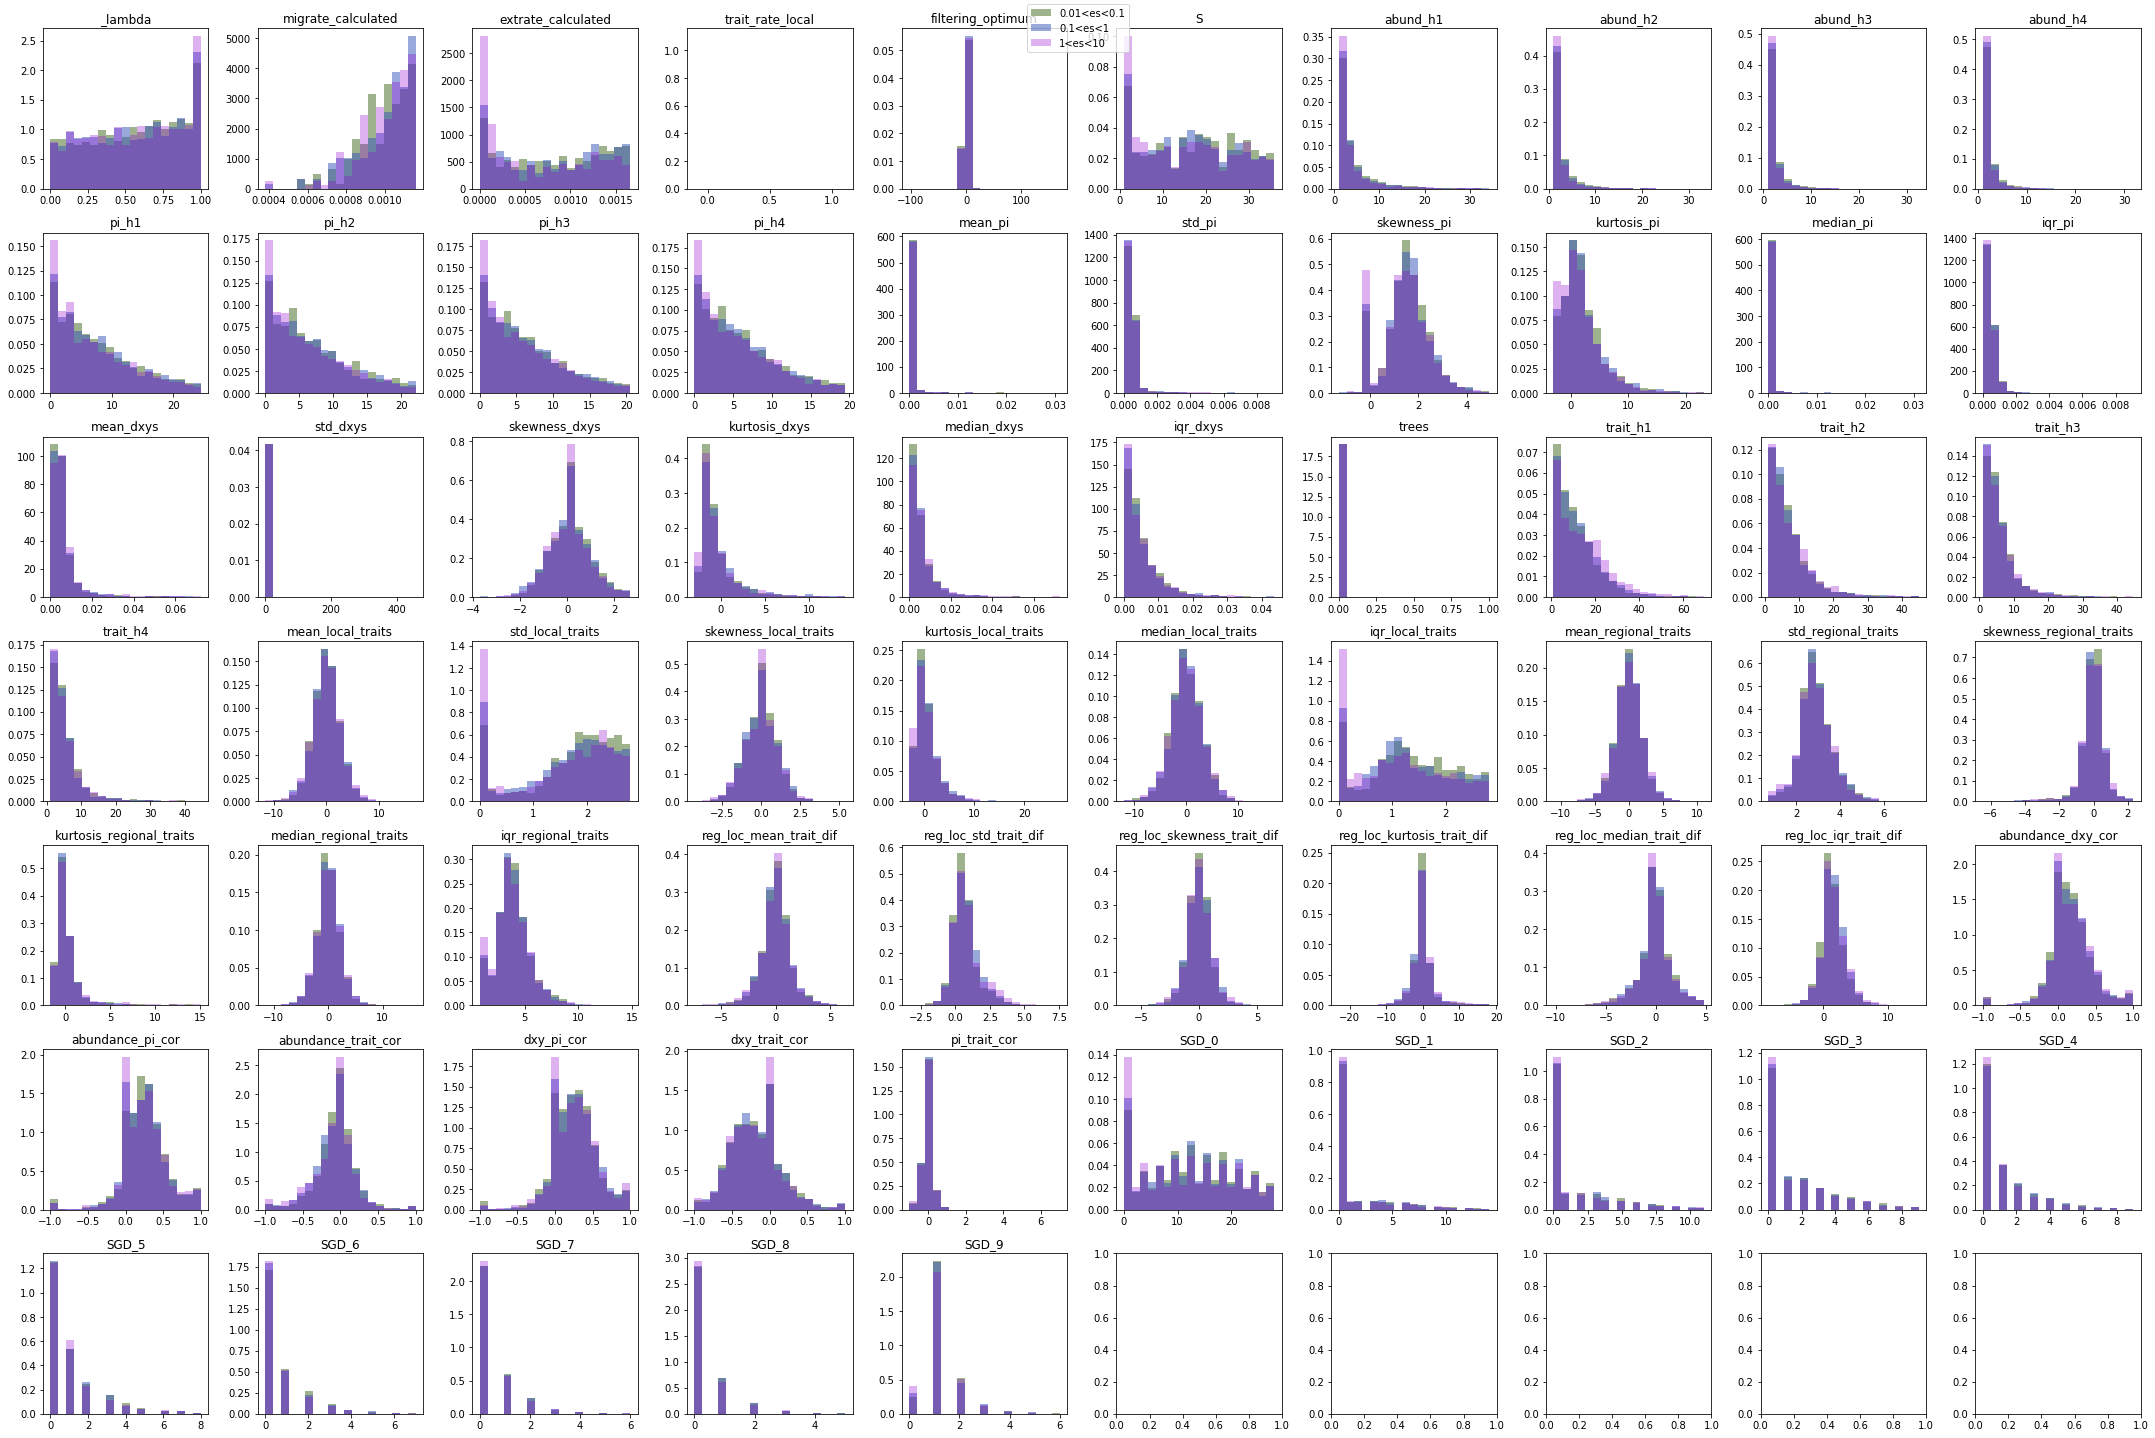

In [98]:
fig, ax = plt.subplots(7, 10, figsize=(30, 20))
axs = fig.axes

for p, ax in zip(list(pairwise_competition.columns)[21:], axs):
    b=np.linspace(np.min(pairwise_competition[p]),np.max(pw_500[p]),20)
    ax.hist(pw_es_low[p], color='#3F681C', density=True, bins=b, alpha=0.5, label='0.01<es<0.1')
    ax.hist(pw_es_med[p], color='#3755BB', density=True, bins=b, alpha=0.5, label='0.1<es<1')
    ax.hist(pw_es_high[p], color='#9400D3', density=True, bins=b, alpha=0.3, label='1<es<10')
    ax.set_title(p)
    handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
fig.tight_layout()
plt.show
plt.savefig('./matrix_analysis_ecol_strength.png')

In [119]:
print(np.min(pairwise_competition["m"]),np.max(pairwise_competition["m"]))
pw_m_low=pairwise_competition[pd.to_numeric(pairwise_competition["m"])<0.004]
pw_m_med=pairwise_competition[pd.to_numeric(pairwise_competition["m"])<0.1]
pw_m_med=pw_m_med[pd.to_numeric(pw_m_med["m"])>=0.004]
pw_m_high=pairwise_competition[pd.to_numeric(pairwise_competition["m"])<10]
pw_m_high=pw_m_high[pd.to_numeric(pw_m_high["m"])>1]
print(pw_m_low.shape, pw_m_med.shape, pw_m_high.shape)
print(pairwise_competition["m"])

0.001 0.01
(3880, 86) (2529, 86) (0, 86)
3746     0.00534
3748     0.00822
3785     0.00685
3792     0.00277
3810     0.00290
          ...   
30837    0.00136
30839    0.00701
30843    0.00473
30847    0.00446
30848    0.00605
Name: m, Length: 6409, dtype: float64


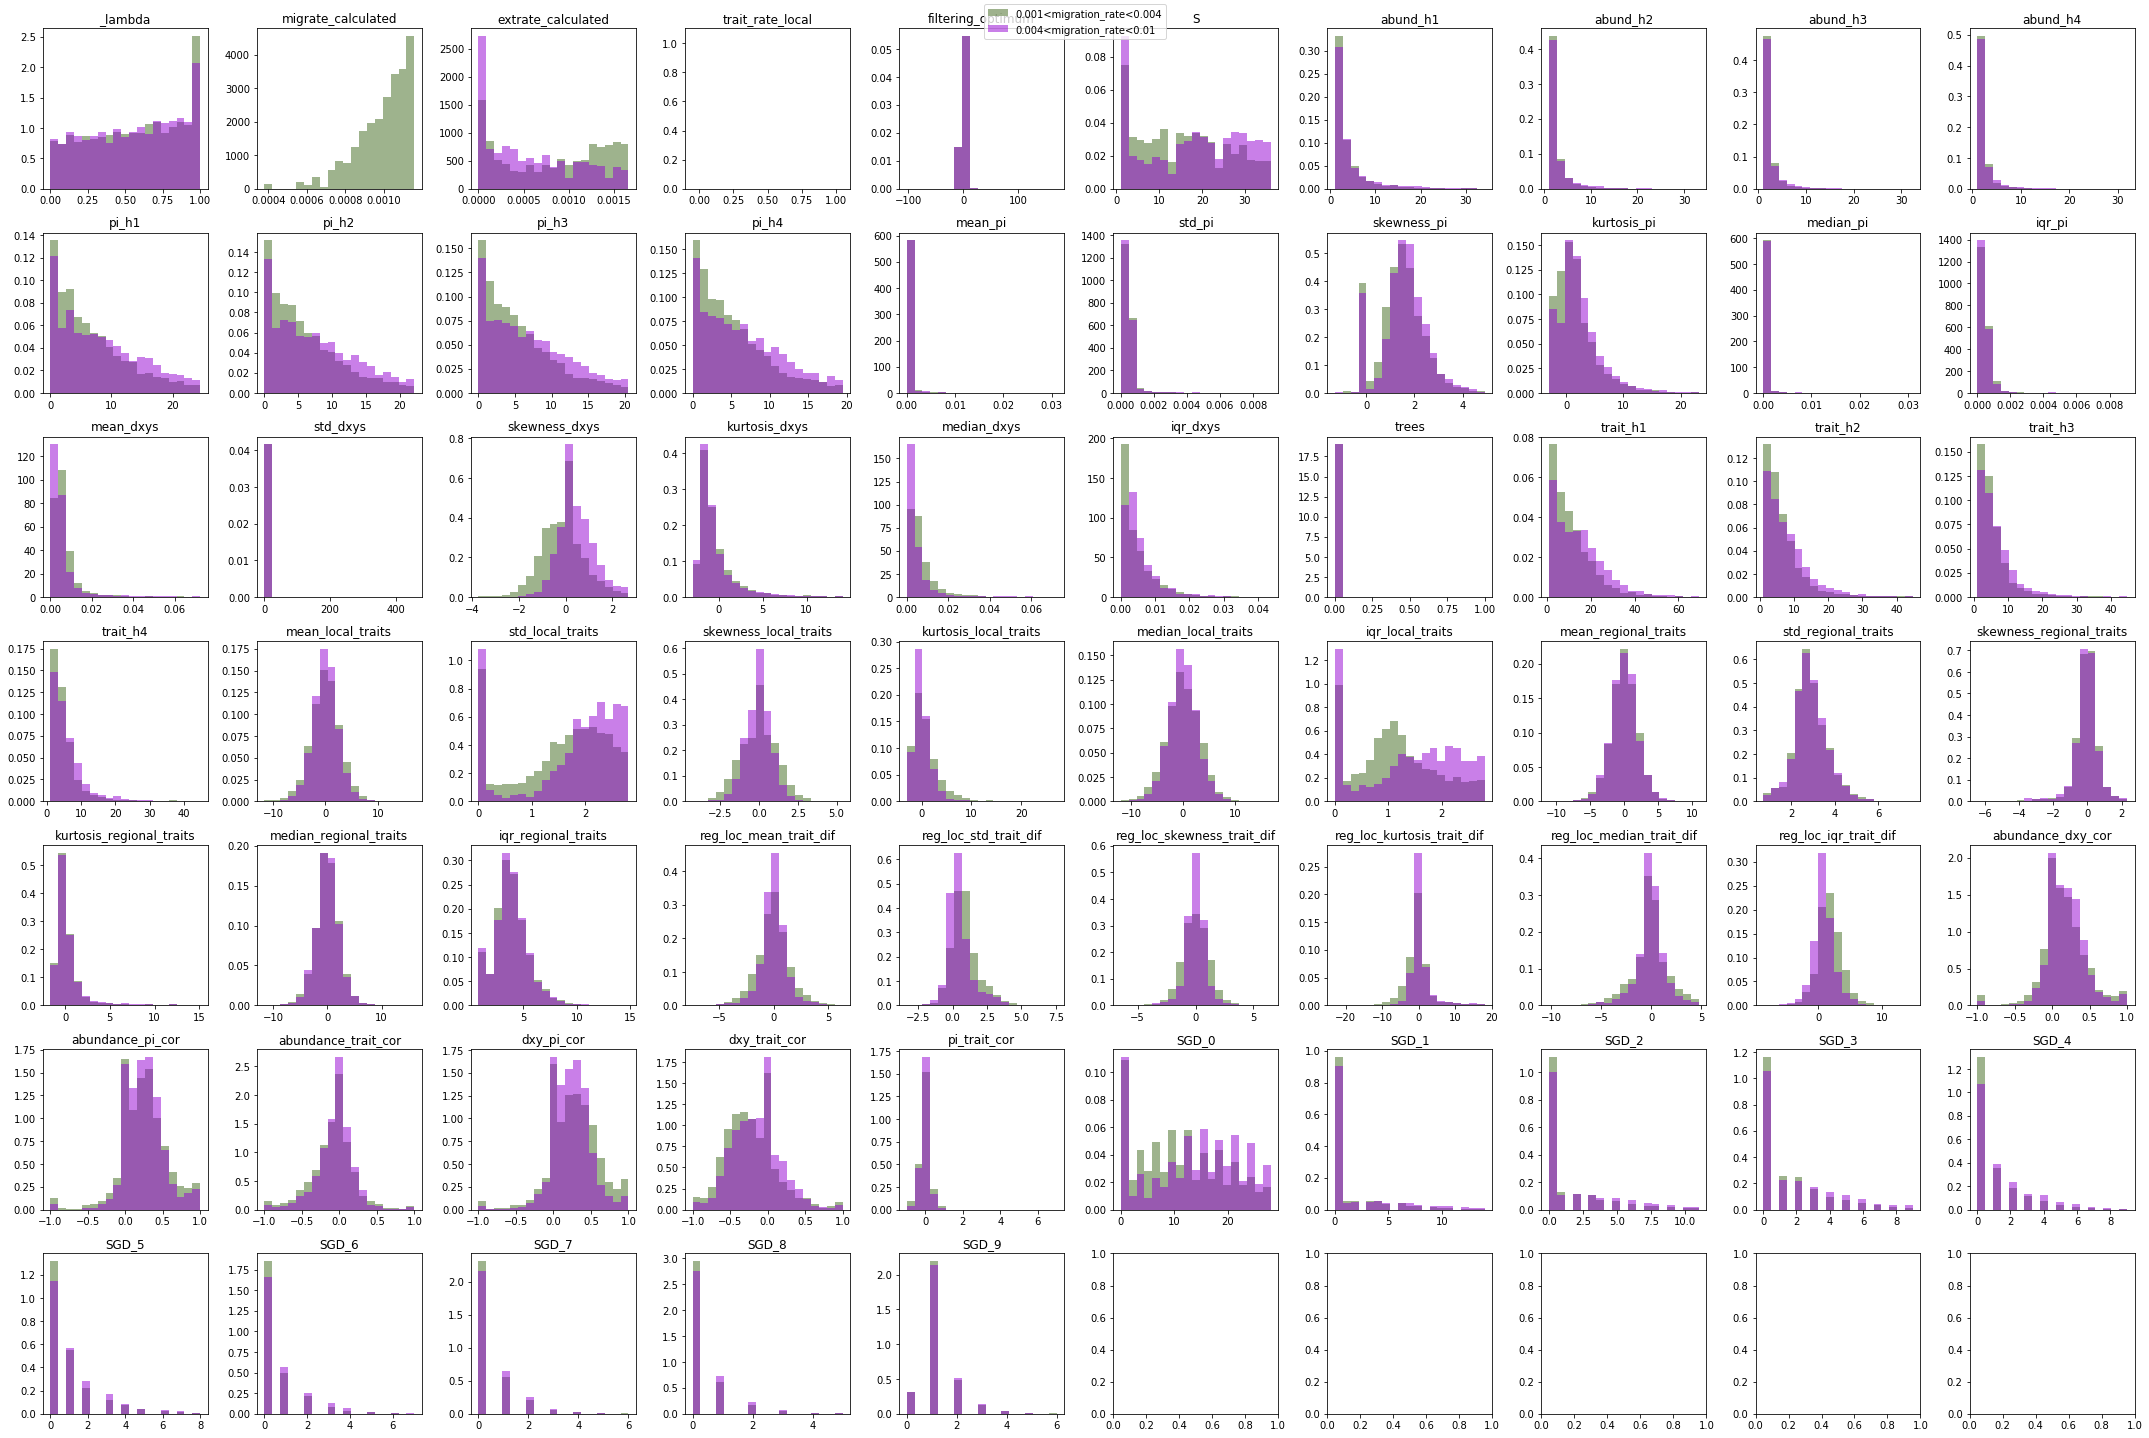

In [128]:
fig, ax = plt.subplots(7, 10, figsize=(30, 20))
axs = fig.axes

for p, ax in zip(list(pairwise_competition.columns)[21:], axs):
    b=np.linspace(np.min(pairwise_competition[p]),np.max(pw_500[p]),20)
    ax.hist(pw_m_low[p], color='#3F681C', density=True, bins=b, alpha=0.5, label='0.001<migration_rate<0.004')
    ax.hist(pw_m_med[p], color='#9400D3', density=True, bins=b, alpha=0.5, label='0.004<migration_rate<0.01')
    #ax.hist(pw_m_high[p], color='#9400D3', density=True, bins=b, alpha=0.3, label='1<es<10')
    ax.set_title(p)
    handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
fig.tight_layout()
plt.show
plt.savefig('./matrix_analysis_migration_rate.png')

In [121]:
print(np.min(pairwise_competition["speciation_prob"]),np.max(pairwise_competition["speciation_prob"]))
pw_s_low=pairwise_competition[pd.to_numeric(pairwise_competition["speciation_prob"])<0.001]
pw_s_med=pairwise_competition[pd.to_numeric(pairwise_competition["speciation_prob"])<0.1]
pw_s_med=pw_s_med[pd.to_numeric(pw_s_med["speciation_prob"])>=0.001]
pw_s_high=pairwise_competition[pd.to_numeric(pairwise_competition["speciation_prob"])<10]
pw_s_high=pw_s_high[pd.to_numeric(pw_s_high["speciation_prob"])>1]
print(pw_m_low.shape, pw_s_med.shape, pw_s_high.shape)
print(pairwise_competition["speciation_prob"])

0.0005 0.005
(3880, 86) (4506, 86) (0, 86)
3746     0.00344
3748     0.00127
3785     0.00279
3792     0.00282
3810     0.00119
          ...   
30837    0.00241
30839    0.00060
30843    0.00145
30847    0.00175
30848    0.00188
Name: speciation_prob, Length: 6409, dtype: float64


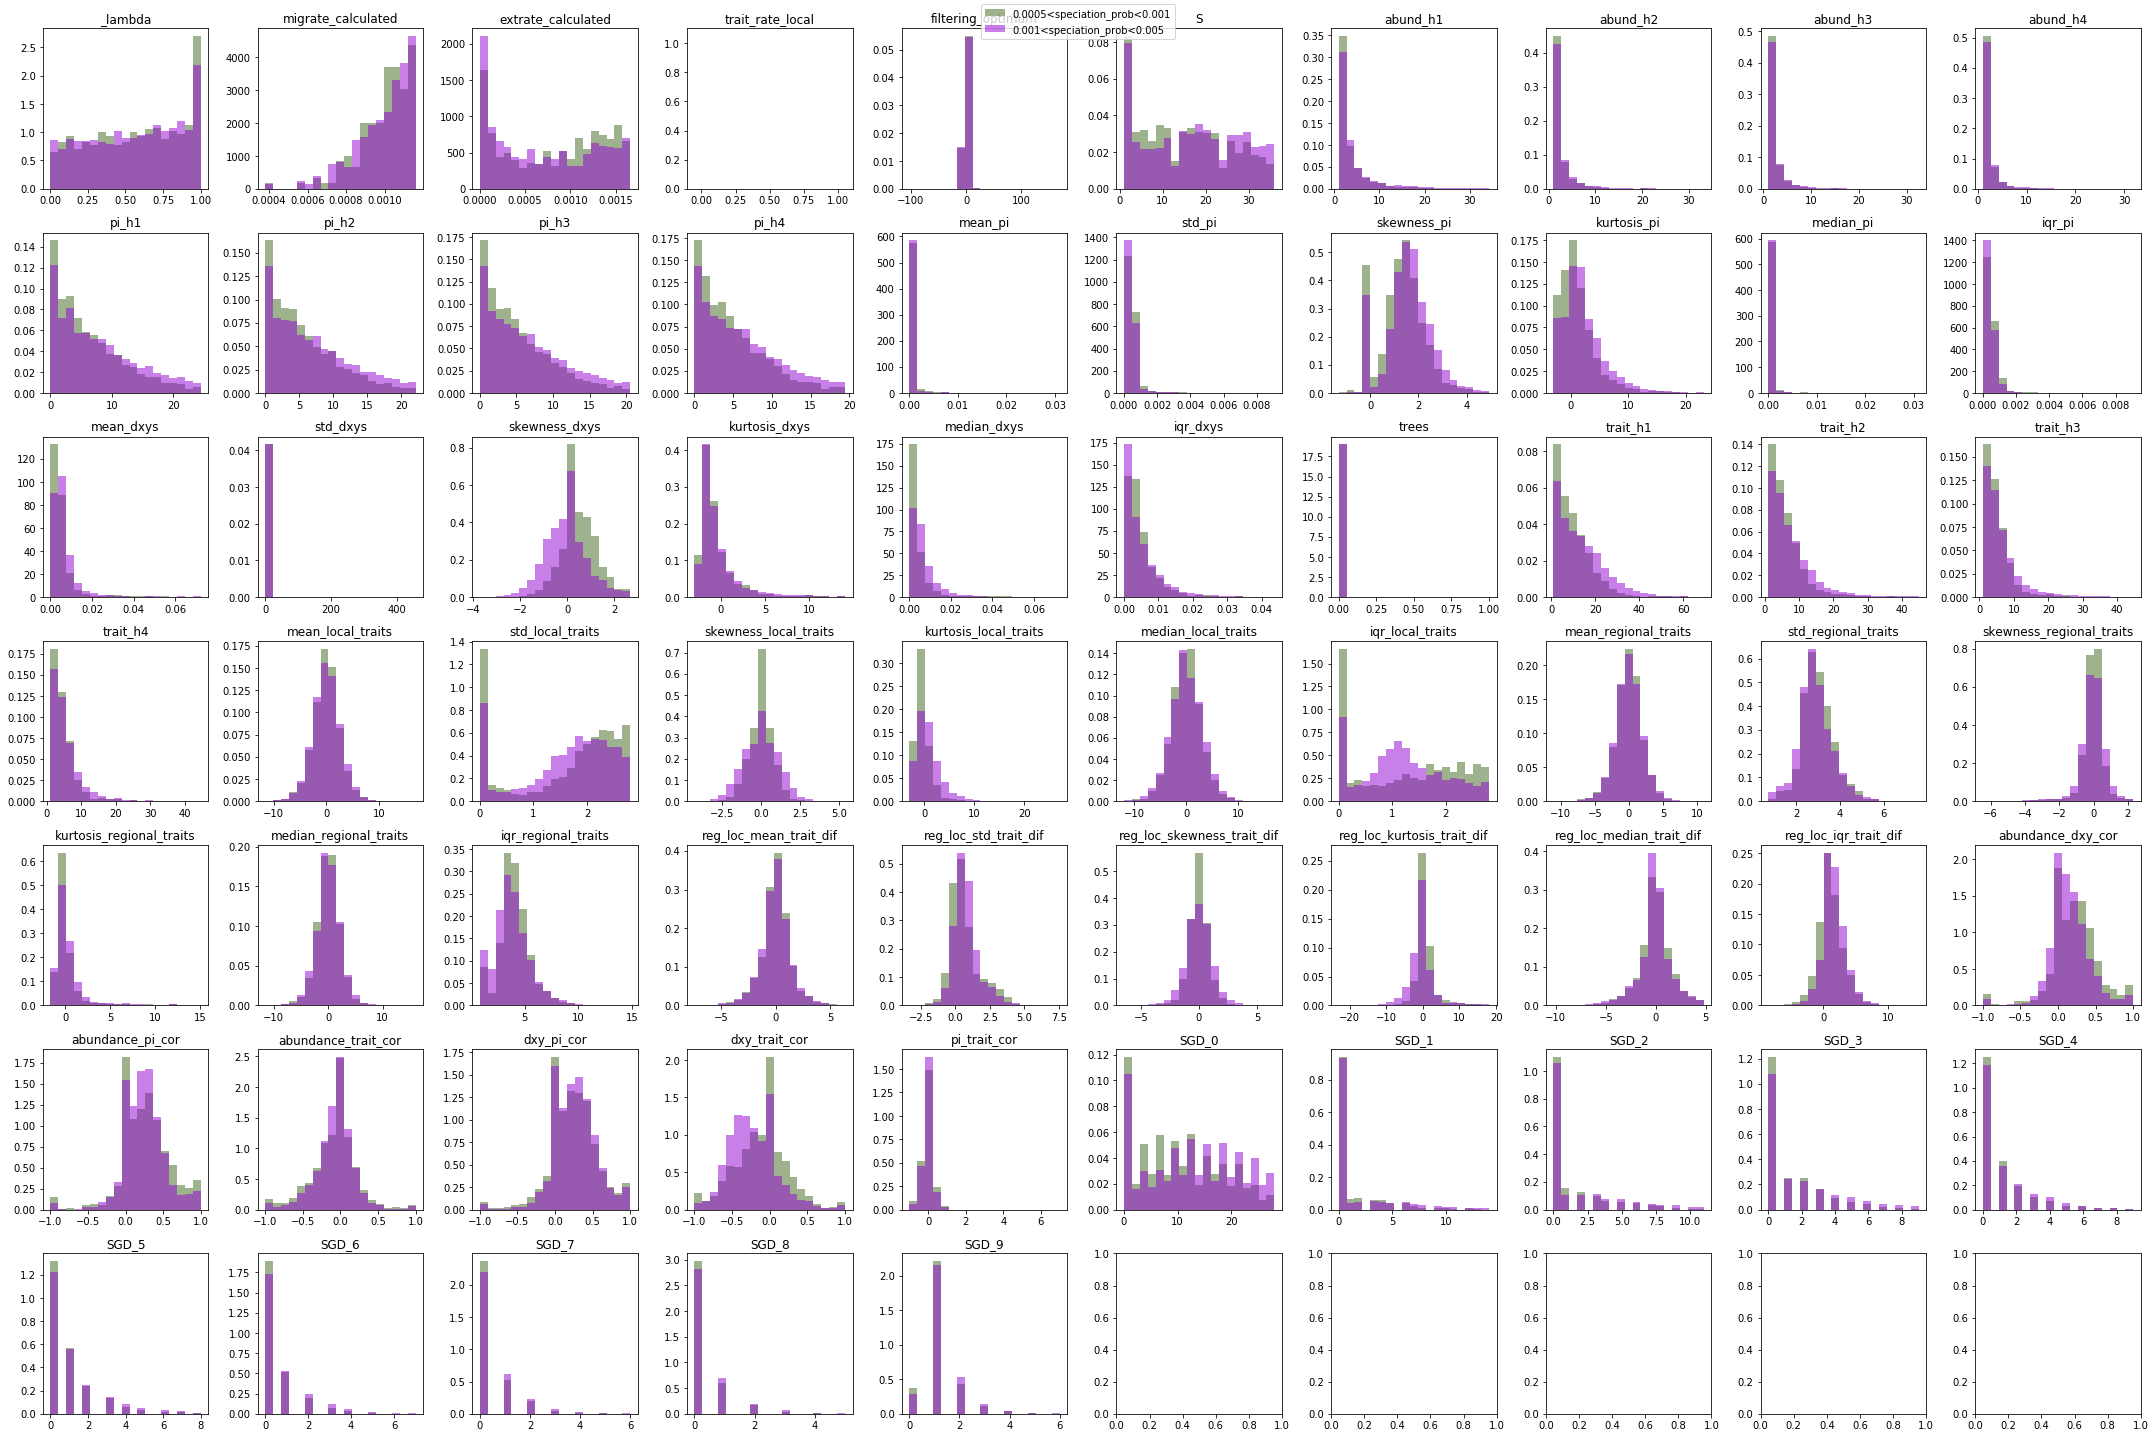

In [127]:
fig, ax = plt.subplots(7, 10, figsize=(30, 20))
axs = fig.axes

for p, ax in zip(list(pairwise_competition.columns)[21:], axs):
    b=np.linspace(np.min(pairwise_competition[p]),np.max(pw_500[p]),20)
    ax.hist(pw_s_low[p], color='#3F681C', density=True, bins=b, alpha=0.5, label='0.0005<speciation_prob<0.001')
    ax.hist(pw_s_med[p], color='#9400D3', density=True, bins=b, alpha=0.5, label='0.001<speciation_prob<0.005')
    #ax.hist(pw_m_high[p], color='#9400D3', density=True, bins=b, alpha=0.3, label='1<es<10')
    ax.set_title(p)
    handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
fig.tight_layout()
plt.show
plt.savefig('./matrix_analysis_speciation_rate.png')